In [4896]:
# !pip3 install matplotlib
# !pip3 install seaborn
# !pip3 install scipy



In [ ]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [4898]:
#Read in the csv file and convert to a Pandas dataframe

World_Happiness_2015 = pd.read_csv("/Users/emtnan/Desktop/GitHub/tuwaiq/Day-8 -9-10 Emtnan Exploratory_Data_Analysis/Usecase-2 Emtnan/Data/2015.csv")
World_Happiness_2016 = pd.read_csv("/Users/emtnan/Desktop/GitHub/tuwaiq/Day-8 -9-10 Emtnan Exploratory_Data_Analysis/Usecase-2 Emtnan/Data/2016.csv")
World_Happiness_2017 = pd.read_csv("/Users/emtnan/Desktop/GitHub/tuwaiq/Day-8 -9-10 Emtnan Exploratory_Data_Analysis/Usecase-2 Emtnan/Data/2017.csv")
World_Happiness_2018 = pd.read_csv("/Users/emtnan/Desktop/GitHub/tuwaiq/Day-8 -9-10 Emtnan Exploratory_Data_Analysis/Usecase-2 Emtnan/Data/2018.csv")
World_Happiness_2019 = pd.read_csv("/Users/emtnan/Desktop/GitHub/tuwaiq/Day-8 -9-10 Emtnan Exploratory_Data_Analysis/Usecase-2 Emtnan/Data/2019.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4899]:
print("The size of dataset World Happiness in 2015 is \n" , World_Happiness_2015.shape ,"\nThe size of dataset World Happiness in 2016 is \n" , World_Happiness_2016.shape ,"\nThe size of dataset World Happiness in 2017 is \n" , World_Happiness_2017.shape , "\nThe size of dataset World Happiness in 2018 is \n",World_Happiness_2018.shape ,"\nThe size of dataset World Happiness in 2019 is \n " , World_Happiness_2019.shape)

The size of dataset World Happiness in 2015 is 
 (158, 12) 
The size of dataset World Happiness in 2016 is 
 (157, 13) 
The size of dataset World Happiness in 2017 is 
 (155, 12) 
The size of dataset World Happiness in 2018 is 
 (156, 9) 
The size of dataset World Happiness in 2019 is 
  (156, 9)


In [4900]:
World_Happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4901]:
World_Happiness_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4902]:
World_Happiness_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4903]:
World_Happiness_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [4904]:
World_Happiness_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4905]:
World_Happiness_2015.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [4906]:
World_Happiness_2016.head(1)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


In [4907]:
World_Happiness_2017.head(1)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


In [4908]:
World_Happiness_2018.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


In [4909]:
World_Happiness_2019.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [4910]:
print( "\n The columns in  World Happiness 2015 dataset are \n", World_Happiness_2015.columns , "\n \n The columns in  World Happiness 2016 dataset are \n " , World_Happiness_2016.columns , "\n \n The columns in  World Happiness 2017 dataset are \n " , World_Happiness_2017.columns)


 The columns in  World Happiness 2015 dataset are 
 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') 
 
 The columns in  World Happiness 2016 dataset are 
  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 
 
 The columns in  World Happiness 2017 dataset are 
  Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Res

In [4911]:
 print ("\n \n The columns in  World Happiness 2018 dataset are \n " , World_Happiness_2018.columns , "\n \n The columns in  World Happiness 2019 dataset are \n " , World_Happiness_2019.columns)


 
 The columns in  World Happiness 2018 dataset are 
  Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object') 
 
 The columns in  World Happiness 2019 dataset are 
  Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [4912]:
World_Happiness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4913]:
World_Happiness_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [4914]:
World_Happiness_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [4915]:
World_Happiness_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4916]:
World_Happiness_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4917]:
World_Happiness_2015.describe(include='number')

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [4918]:
World_Happiness_2016.describe(include='number')

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [4919]:
World_Happiness_2017.describe(include='number')

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [4920]:
World_Happiness_2018.describe(include='number')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [4921]:
World_Happiness_2019.describe(include='number')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [4922]:
World_Happiness_2015.describe(include='object')

,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


In [4923]:
World_Happiness_2016.describe(include='object')

,Country,Region
count,157,157
unique,157,10
top,Denmark,Sub-Saharan Africa
freq,1,38


In [4924]:
World_Happiness_2017.describe(include='object')

,Country
count,155
unique,155
top,Norway
freq,1


In [4925]:
World_Happiness_2018.describe(include='object')

,Country or region
count,156
unique,156
top,Finland
freq,1


In [4926]:
World_Happiness_2019.describe(include='object')

,Country or region
count,156
unique,156
top,Finland
freq,1


In [4927]:
World_Happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4928]:
World_Happiness_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4929]:
World_Happiness_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4930]:
World_Happiness_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [4931]:
World_Happiness_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [4932]:
# Data sourced from Kaggle: https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2015.csv  
# Original source: Gallup World Poll & Sustainable Development Solutions Network (SDSN)

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [4933]:
# The dataset from 2015 until 2019 aligns with the analysis period, ensuring relevant timeliness.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [4934]:
#Inconsistency: The column names not consistent across the years and Some countries appear in 2015 but are missing in 2016

In [4935]:
#The number of people and countries surveyed varies year to year, but by and large more than 100,000 people in 130 countries participate in the Gallup World Poll each year.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [4936]:
print(World_Happiness_2015['Region'].unique())

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


In [4937]:
MiddleEastـNorthernAfrica = World_Happiness_2015[World_Happiness_2015['Region'] == 'Middle East and Northern Africa']
MiddleEastـNorthernAfrica

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
10,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
21,Oman,Middle East and Northern Africa,22,6.853,0.05335,1.36011,1.08182,0.76276,0.63274,0.32524,0.21542,2.47489
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674
34,Saudi Arabia,Middle East and Northern Africa,35,6.411,0.04633,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872
38,Kuwait,Middle East and Northern Africa,39,6.295,0.04456,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228,1.87634
48,Bahrain,Middle East and Northern Africa,49,5.960,0.05412,1.32376,1.21624,0.74716,0.45492,0.30600,0.17362,1.73797
62,Libya,Middle East and Northern Africa,63,5.754,0.07832,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295,2.09066
67,Algeria,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
75,Turkey,Middle East and Northern Africa,76,5.332,0.03864,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528


In [4938]:
print("Number of Middle East Northern Africacountries:", MiddleEastـNorthernAfrica["Country"].nunique())

Number of Middle East Northern Africacountries: 20


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


### 2015
### 158 Country

In [4939]:
World_Happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4940]:
World_Happiness_2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [4941]:
# check number of row duplicate
World_Happiness_2015.duplicated().sum()

np.int64(0)

In [4942]:
World_Happiness_2015[World_Happiness_2015.duplicated()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [4943]:
World_Happiness_2015[World_Happiness_2015.duplicated(['Country'])]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [4944]:
World_Happiness_2015[World_Happiness_2015.duplicated(['Happiness Rank'])]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.1826,0.14296,0.1614,2.10017


In [4945]:
duplicated_rows = World_Happiness_2015[World_Happiness_2015.duplicated(['Happiness Rank'], keep=False)]
duplicated_rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
81,Jordan,Middle East and Northern Africa,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017


In [4946]:
World_Happiness_2015.duplicated(['Country', 'Happiness Rank']).sum()

np.int64(0)

In [4947]:
#Variable Selection: there is no column  not be relevant for our analysis

In [4948]:
World_Happiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4949]:

dash_counts = (World_Happiness_2015 == '-').sum()

print(dash_counts)


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


### 2016
### 157 Country

In [4950]:
World_Happiness_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4951]:
World_Happiness_2016.tail()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [4952]:
# check number of row duplicate
World_Happiness_2016.duplicated().sum()

np.int64(0)

In [4953]:
World_Happiness_2016[World_Happiness_2016.duplicated()]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [4954]:
World_Happiness_2016[World_Happiness_2016.duplicated(['Country'])]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [4955]:
World_Happiness_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [4956]:

dash_counts = (World_Happiness_2016 == '-').sum()

print(dash_counts)


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


### 2017
### 155 Country

In [4957]:
World_Happiness_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4958]:
World_Happiness_2017.tail()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [4959]:
# check number of row duplicate
World_Happiness_2017.duplicated().sum()

np.int64(0)

In [4960]:
World_Happiness_2017[World_Happiness_2017.duplicated()]

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


In [4961]:
World_Happiness_2017[World_Happiness_2017.duplicated(['Country'])]

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


In [4962]:
World_Happiness_2017[World_Happiness_2017.duplicated(['Happiness.Rank'] , keep=False)]

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


In [4963]:
expected_ranks = set(range(1, 155))
actual_ranks = set(World_Happiness_2017['Happiness.Rank'])
missing_ranks = sorted(expected_ranks - actual_ranks)

In [4964]:
print("Missing Ranks", missing_ranks)

Missing Ranks []


In [4965]:
duplicates_count = World_Happiness_2017['Happiness.Rank'].value_counts()
duplicates_count[duplicates_count > 1] 

Series([], Name: count, dtype: int64)

In [4966]:
duplicates_count = World_Happiness_2017['Happiness.Score'].value_counts()
duplicates_count[duplicates_count > 1] 

Happiness.Score
6.454    2
5.074    2
5.838    2
7.284    2
Name: count, dtype: int64

### Same Happiness.Score diffrente Happiness.Rank

In [4967]:
World_Happiness_2017[World_Happiness_2017.duplicated(['Happiness.Score'] , keep=False)]

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211
27,Uruguay,28,6.454,6.545906,6.362094,1.217560,1.412228,0.719217,0.579392,0.175097,0.178062,2.172410
28,Guatemala,29,6.454,6.566874,6.341126,0.872002,1.255585,0.540240,0.531311,0.283488,0.077223,2.893891
54,South Korea,55,5.838,5.922559,5.753441,1.401678,1.128274,0.900214,0.257922,0.206674,0.063283,1.880378
55,Moldova,56,5.838,5.908371,5.767629,0.728871,1.251826,0.589465,0.240729,0.208779,0.010091,2.807808
93,Vietnam,94,5.074,5.147281,5.000719,0.788548,1.277491,0.652169,0.571056,0.234968,0.087633,1.462319
94,Nigeria,95,5.074,5.209500,4.938500,0.783756,1.215770,0.056916,0.394953,0.230947,0.026122,2.365391


In [4968]:
World_Happiness_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [4969]:

dash_counts = (World_Happiness_2017 == '-').sum()

print(dash_counts)

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64


### 2018
### 156 Country

In [4970]:
World_Happiness_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [4971]:
World_Happiness_2018.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076


In [4972]:
# check number of row duplicate
World_Happiness_2018.duplicated().sum()

np.int64(0)

In [4973]:
World_Happiness_2018[World_Happiness_2018.duplicated()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [4974]:
World_Happiness_2018[World_Happiness_2018.duplicated(['Country or region'])]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [4975]:
World_Happiness_2018[World_Happiness_2018.duplicated(['Overall rank'] , keep=False)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


### same score with different rank

In [4976]:
World_Happiness_2018[World_Happiness_2018.duplicated(['Score'] , keep=False)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
72,73,Belarus,5.483,1.039,1.498,0.700,0.307,0.101,0.154
73,74,Turkey,5.483,1.148,1.380,0.686,0.324,0.106,0.109
78,79,Greece,5.358,1.154,1.202,0.879,0.131,0.000,0.044
79,80,Lebanon,5.358,0.965,1.179,0.785,0.503,0.214,0.136


In [4977]:
expected_ranks = set(range(1, 156))
actual_ranks = set(World_Happiness_2018['Overall rank'])
missing_ranks = sorted(expected_ranks - actual_ranks)
print("Missing Ranks", missing_ranks)

Missing Ranks []


In [4978]:
World_Happiness_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [4979]:

dash_counts = (World_Happiness_2018 == '-').sum()

print(dash_counts)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [4980]:
# go to delete duplicates columns

### 2019
### 156 Country

In [4981]:
World_Happiness_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4982]:
World_Happiness_2019.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [4983]:
# check number of row duplicate
World_Happiness_2019.duplicated().sum()

np.int64(0)

In [4984]:
World_Happiness_2019[World_Happiness_2019.duplicated()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [4985]:
World_Happiness_2019[World_Happiness_2019.duplicated(['Country or region'])]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [4986]:
expected_ranks = set(range(1, 156))
actual_ranks = set(World_Happiness_2019['Overall rank'])
missing_ranks = sorted(expected_ranks - actual_ranks)
print("Missing Ranks", missing_ranks)

Missing Ranks []


In [4987]:
World_Happiness_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [4988]:
dash_counts = (World_Happiness_2019 == '-').sum()

print(dash_counts)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

### 2015

In [4989]:
World_Happiness_2015.isnull().sum().sort_values(ascending = False)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### 2016

In [4990]:
World_Happiness_2016.isnull().sum().sort_values(ascending = False)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### 2017

In [4991]:
World_Happiness_2017.isnull().sum().sort_values(ascending = False)

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

### 2018

In [4992]:
World_Happiness_2018.isnull().sum().sort_values(ascending = False)

Perceptions of corruption       1
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
dtype: int64

In [4993]:
World_Happiness_2018[World_Happiness_2018['Perceptions of corruption'].isnull()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [4994]:
World_Happiness_2018[World_Happiness_2018['Perceptions of corruption'].isnull()].describe(include='all')

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,1.0,1,1.000,1.000,1.000,1.00,1.000,1.000,0.0
unique,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,20.0,NaN,6.774,2.096,0.776,0.67,0.284,0.186,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,20.0,NaN,6.774,2.096,0.776,0.67,0.284,0.186,NaN
25%,20.0,NaN,6.774,2.096,0.776,0.67,0.284,0.186,NaN
50%,20.0,NaN,6.774,2.096,0.776,0.67,0.284,0.186,NaN
75%,20.0,NaN,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [4995]:
null_chip_index = World_Happiness_2018[World_Happiness_2018['Perceptions of corruption'].isnull()].index
null_chip_index

Index([19], dtype='int64')

### 2019

In [4996]:
World_Happiness_2019.isnull().sum().sort_values(ascending = False)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [4997]:
#Display number missing values per column

In [4998]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [4999]:
World_Happiness_2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [5000]:
# check columns types 
World_Happiness_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5001]:
# go to clean them 

In [5002]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [5003]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [5004]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [5005]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


### 2015

In [5006]:
World_Happiness_2015.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [5007]:
# check columns types 
World_Happiness_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5008]:
World_Happiness_2015.isnull().sum().sort_values(ascending = False)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5009]:
World_Happiness_2015.duplicated(['Happiness Score', 'Happiness Rank']).sum()

np.int64(1)

In [5010]:
World_Happiness_2015[World_Happiness_2015.duplicated(['Happiness Score', 'Happiness Rank'], keep=False)]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
81,Jordan,Middle East and Northern Africa,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017


![Screenshot 2025-02-07 at 11.00.18 AM.png](<attachment:Screenshot 2025-02-07 at 11.00.18 AM.png>)
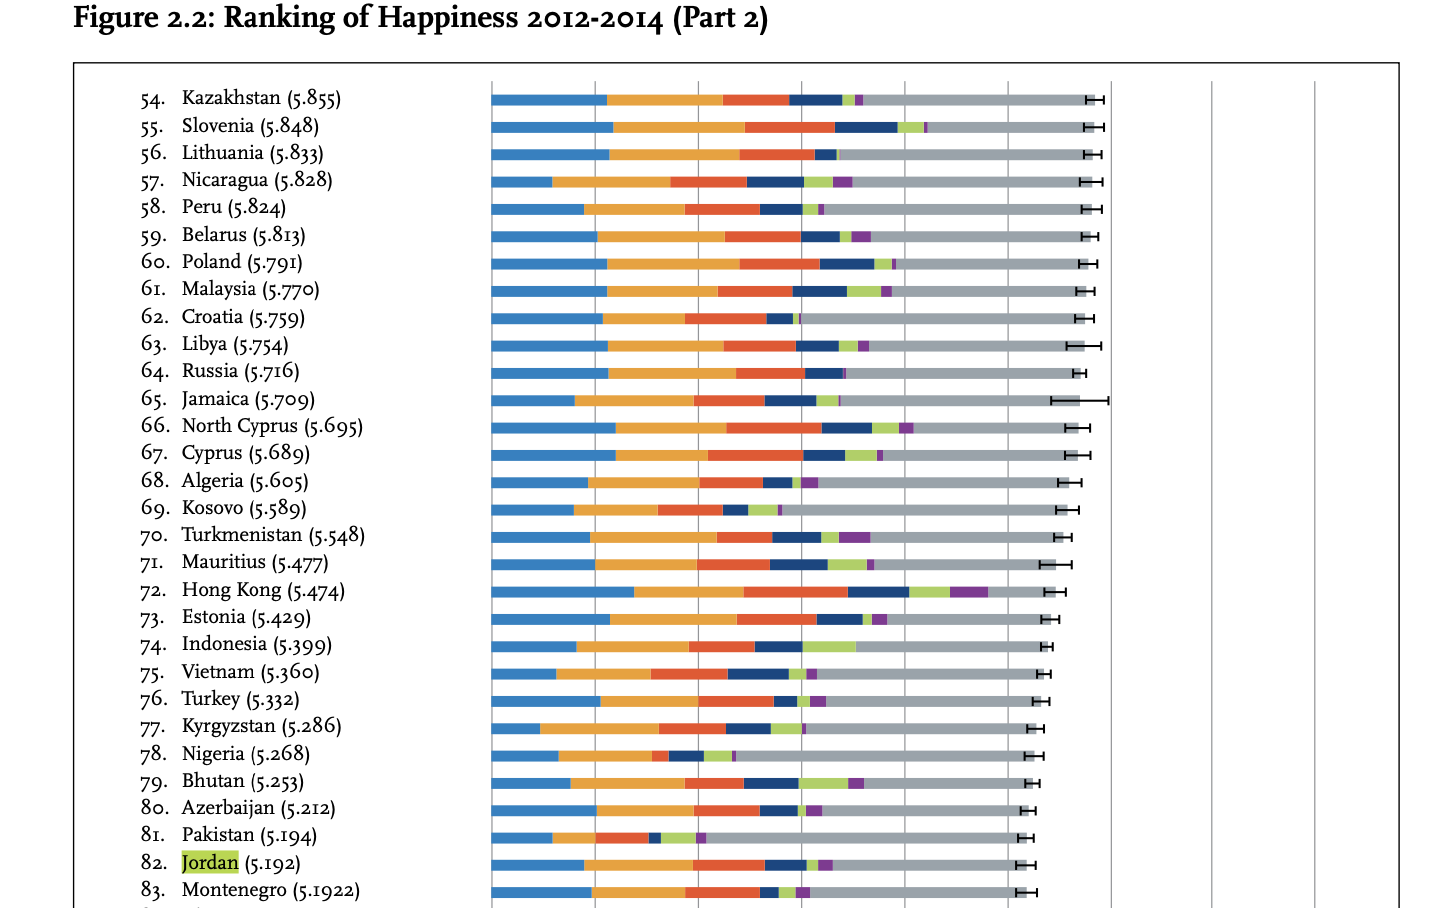

#### In the official 2015 report, Jordan's rank is 82 and Montenegro's rank is 83, but in your dataset both countries are shown as having rank 82 


In [5011]:
World_Happiness_2015[World_Happiness_2015['Happiness Rank'] == 83]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [5012]:
duplicates_count = World_Happiness_2015['Happiness Rank'].value_counts()
duplicates_count[duplicates_count > 1]  

Happiness Rank
82    2
Name: count, dtype: int64

In [5013]:
expected_ranks = set(range(1, 159))
actual_ranks = set(World_Happiness_2015['Happiness Rank'])
missing_ranks = sorted(expected_ranks - actual_ranks)

In [5014]:

print("Missing Ranks", missing_ranks)

Missing Ranks [83]


In [5015]:
World_Happiness_2015.loc[World_Happiness_2015['Country'] == 'Montenegro', 'Happiness Rank'] = 83

In [5016]:
print("Missing Ranks", missing_ranks)

Missing Ranks [83]


In [5017]:
duplicated_rows = World_Happiness_2015[World_Happiness_2015.duplicated(['Happiness Rank'], keep=False)]
duplicated_rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [5018]:
duplicated_rows = World_Happiness_2015[World_Happiness_2015.duplicated(['Happiness Score'], keep=False)]
duplicated_rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
81,Jordan,Middle East and Northern Africa,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996
82,Montenegro,Central and Eastern Europe,83,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017


### The Happiness Score of Montenegro is :  5.1922 but format dataset display 3 number after point ,so Jordan and Montenegro have same socre

### 2016

In [5019]:
World_Happiness_2016.head(1)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


In [5020]:
# check columns types 
World_Happiness_2016.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5021]:
World_Happiness_2016.isnull().sum().sort_values(ascending = False)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5022]:
World_Happiness_2016['Happiness Rank'].duplicated().sum()

np.int64(3)

In [5023]:
World_Happiness_2016[World_Happiness_2016.duplicated(['Happiness Rank'] , keep=False)]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
33,Saudi Arabia,Middle East and Northern Africa,34,6.379,6.287,6.471,1.48953,0.84829,0.59267,0.37904,0.30008,0.15457,2.61482
34,Taiwan,Eastern Asia,34,6.379,6.305,6.453,1.39729,0.92624,0.79565,0.32377,0.06630,0.25495,2.61523
56,Poland,Central and Eastern Europe,57,5.835,5.749,5.921,1.24585,1.04685,0.69058,0.45190,0.05500,0.14443,2.20035
57,South Korea,Eastern Asia,57,5.835,5.747,5.923,1.35948,0.72194,0.88645,0.25168,0.07716,0.18824,2.35015
144,Burkina Faso,Sub-Saharan Africa,145,3.739,3.647,3.831,0.31995,0.63054,0.21297,0.33370,0.12533,0.24353,1.87319
145,Uganda,Sub-Saharan Africa,145,3.739,3.629,3.849,0.34719,0.90981,0.19625,0.43653,0.06442,0.27102,1.51416


In [5024]:
World_Happiness_2016['Happiness Rank'].value_counts()

Happiness Rank
57     2
34     2
145    2
1      1
108    1
      ..
54     1
55     1
56     1
59     1
157    1
Name: count, Length: 154, dtype: int64

In [5025]:
World_Happiness_2016['Happiness Rank'].duplicated().sum()

np.int64(3)


![Screenshot 2025-02-07 at 11.33.46 AM.png](<attachment:Screenshot 2025-02-07 at 11.33.46 AM.png>)


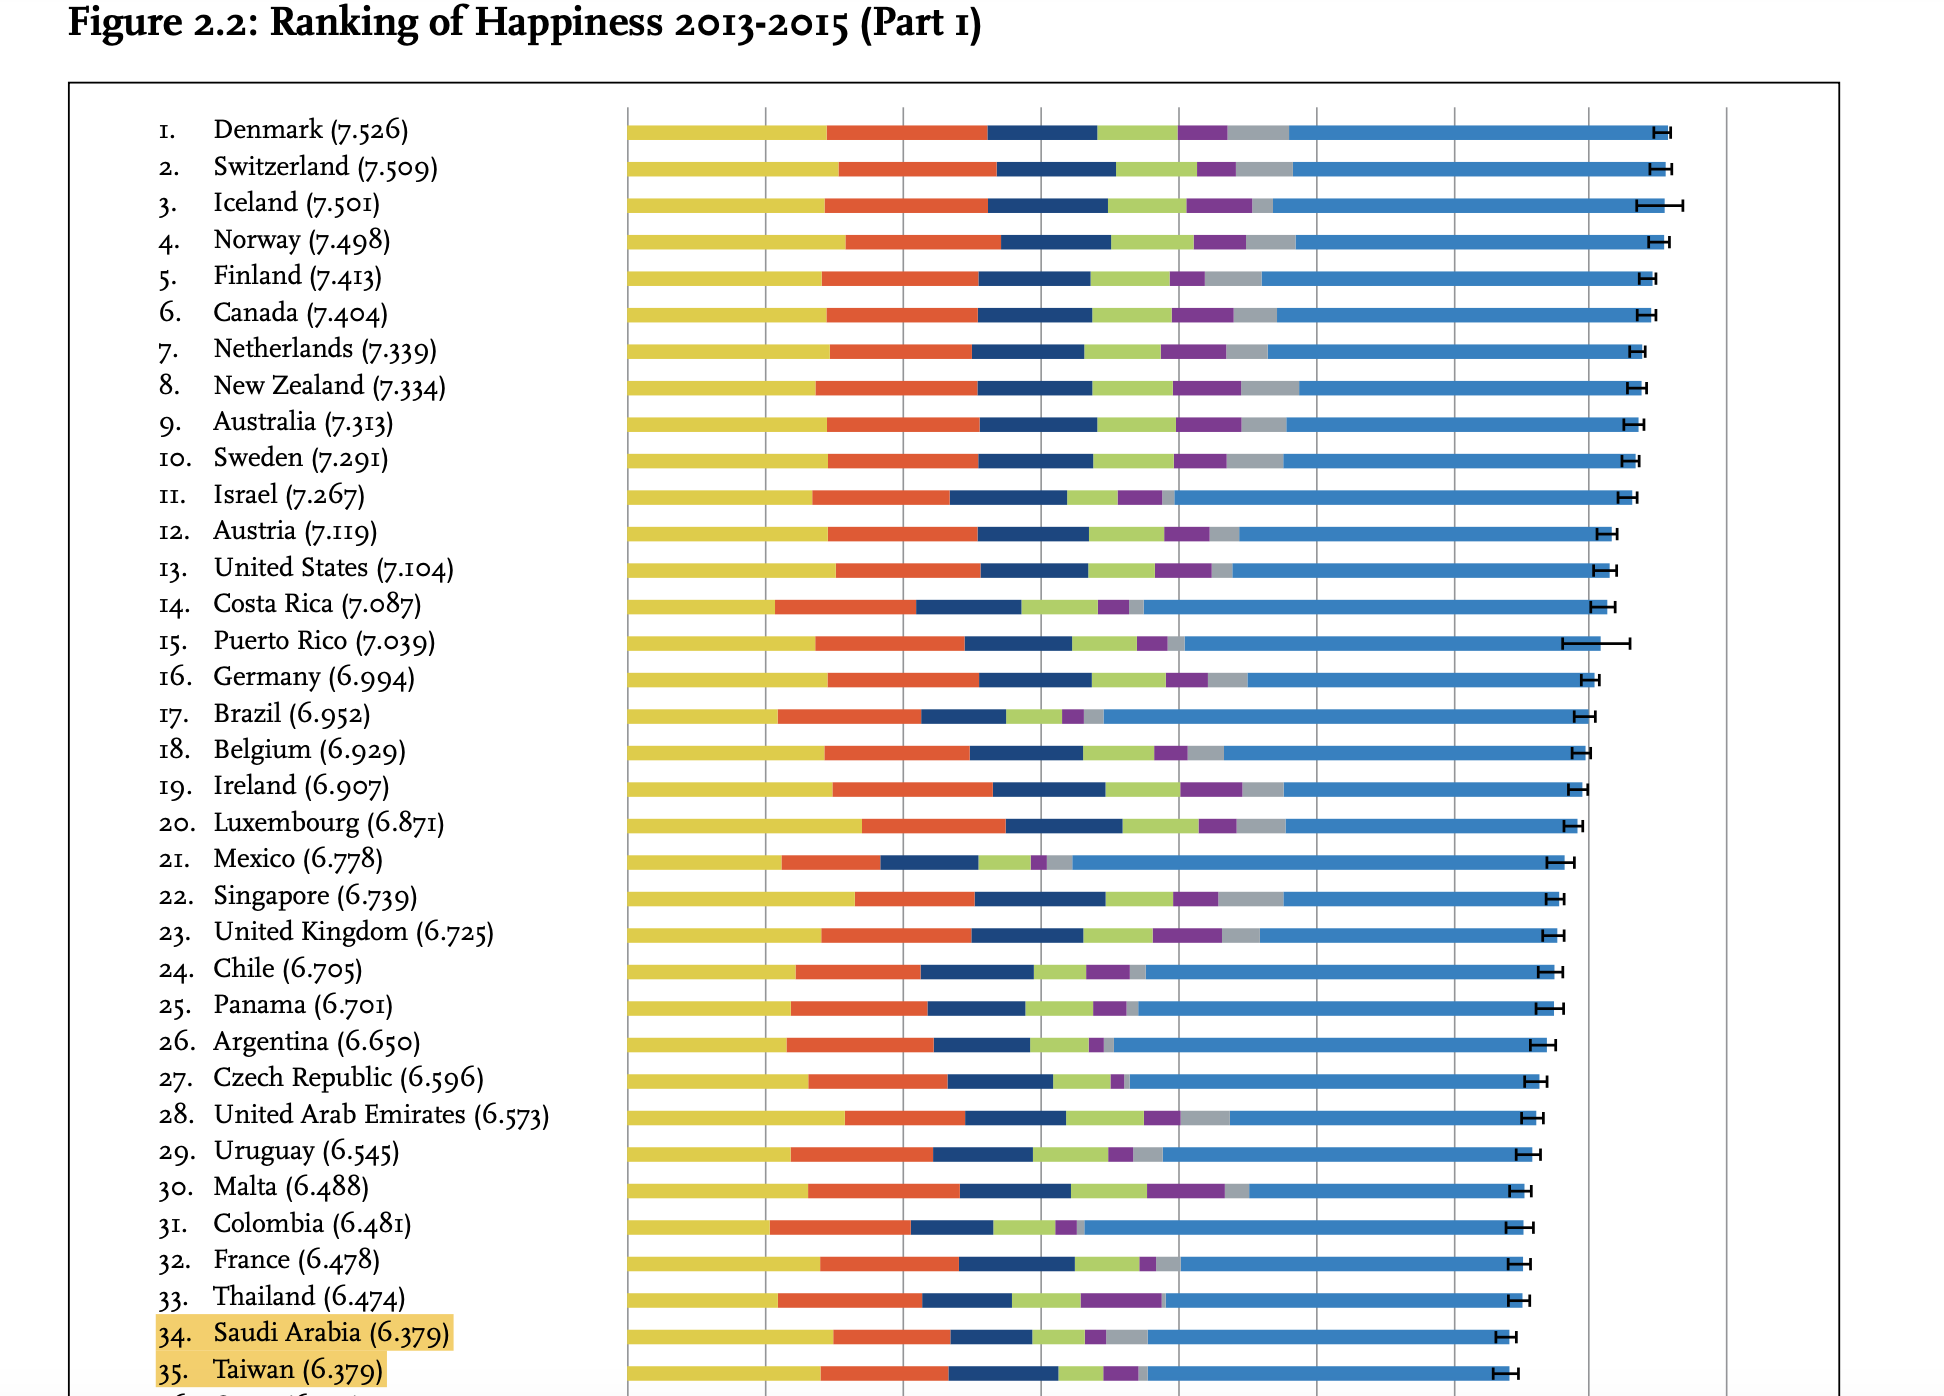


![Screenshot 2025-02-07 at 11.34.30 AM.png](<attachment:Screenshot 2025-02-07 at 11.34.30 AM.png>)
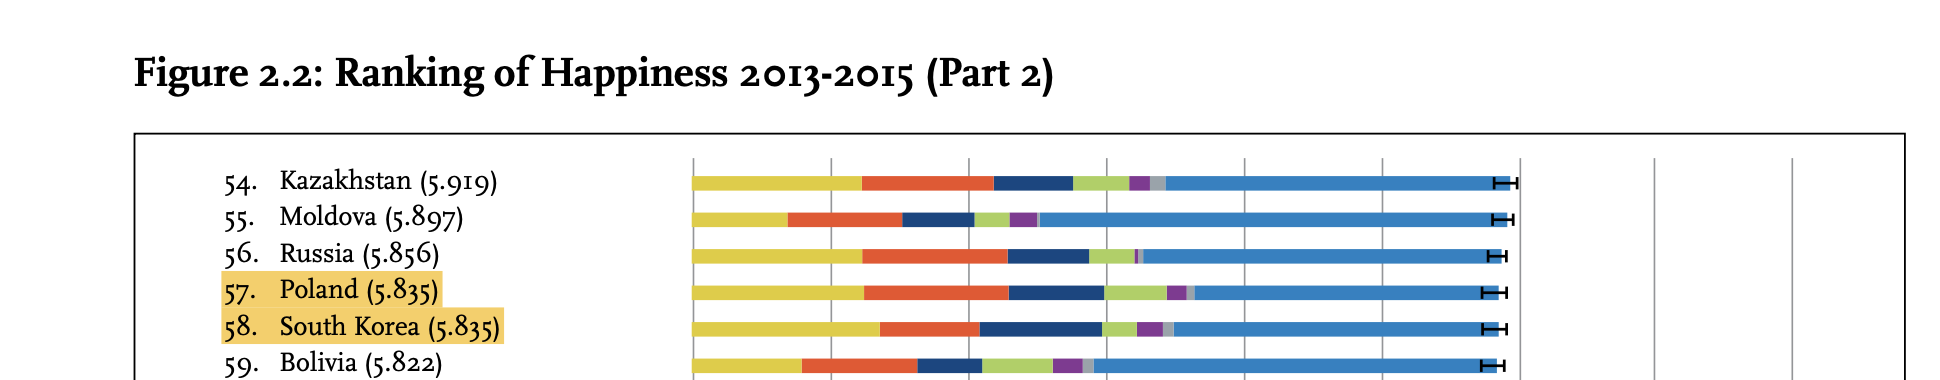


![Screenshot 2025-02-07 at 11.35.03 AM.png](<attachment:Screenshot 2025-02-07 at 11.35.03 AM.png>)
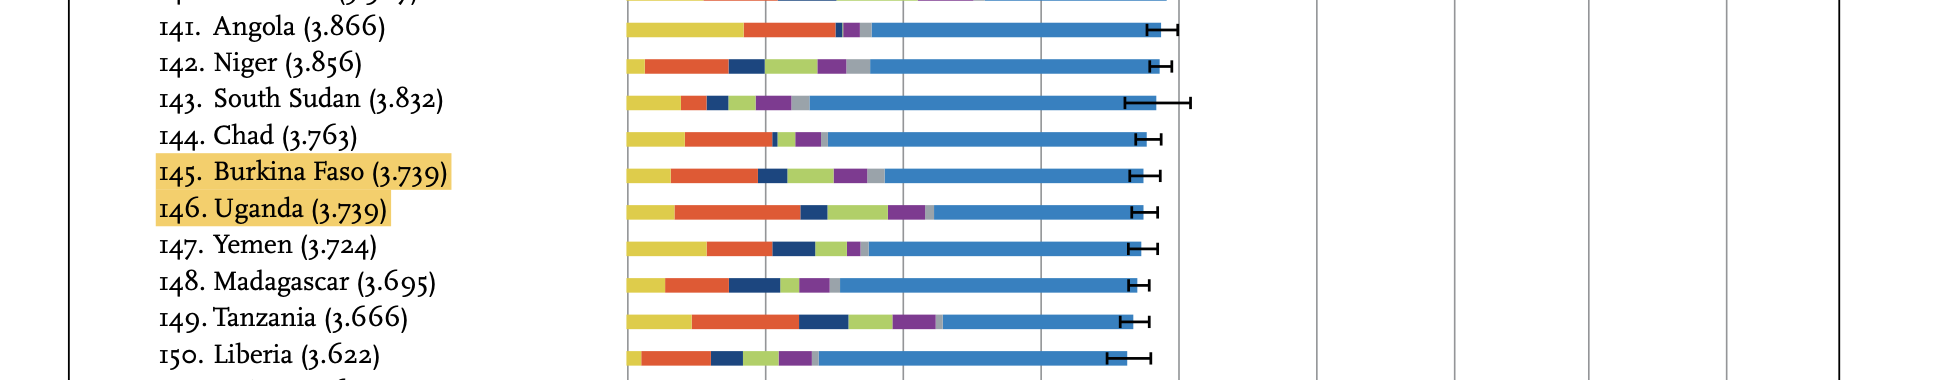

In [5026]:
duplicates_count = World_Happiness_2016['Happiness Rank'].value_counts()
duplicates_count[duplicates_count > 1] 


Happiness Rank
57     2
34     2
145    2
Name: count, dtype: int64

In [5027]:
expected_ranks = set(range(1, 158))
actual_ranks = set(World_Happiness_2016['Happiness Rank'])
missing_ranks = sorted(expected_ranks - actual_ranks)

In [5028]:
print("Missing Ranks", missing_ranks)

Missing Ranks [35, 58, 146]


In [5029]:
World_Happiness_2016.loc[World_Happiness_2016['Country'] == 'Taiwan', 'Happiness Rank'] = 35
World_Happiness_2016.loc[World_Happiness_2016['Country'] == 'South Korea', 'Happiness Rank'] = 58
World_Happiness_2016.loc[World_Happiness_2016['Country'] == 'Uganda', 'Happiness Rank'] = 146

In [5030]:
World_Happiness_2016[World_Happiness_2016.duplicated(['Happiness Rank'] , keep=False)]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


### The Happiness Score of duplicated country have same score 

### 2017

In [5031]:
World_Happiness_2017.head(1)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


In [5032]:
# check columns types 
World_Happiness_2017.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [5033]:
World_Happiness_2017.isnull().sum().sort_values(ascending = False)

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [5034]:
duplicates_count = World_Happiness_2017['Happiness.Rank'].value_counts()
duplicates_count[duplicates_count > 1] 

Series([], Name: count, dtype: int64)

In [5035]:
duplicates_count = World_Happiness_2017['Happiness.Score'].value_counts()
duplicates_count[duplicates_count > 1] 

Happiness.Score
6.454    2
5.074    2
5.838    2
7.284    2
Name: count, dtype: int64

#### Same Happiness.Score diffrente Happiness.Rank

In [5036]:
World_Happiness_2016.head(1)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


In [5037]:
World_Happiness_2017.head(1)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


In [5038]:

rename_2017 = {
    "Happiness.Rank": "Happiness Rank",
    "Happiness.Score": "Happiness Score",
    "Economy..GDP.per.Capita.": "Economy (GDP per Capita)",
    "Health..Life.Expectancy.": "Health (Life Expectancy)",
    "Trust..Government.Corruption.": "Trust (Government Corruption)",
    "Dystopia.Residual": "Dystopia Residual",
    "Whisker.high": "Upper Confidence Interval",
    "Whisker.low": "Lower Confidence Interval",
}

World_Happiness_2017.rename(columns=rename_2017, inplace=True)


In [5039]:
World_Happiness_2017.head(1)

,Country,Happiness Rank,Happiness Score,Upper Confidence Interval,Lower Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


### 2018

In [5040]:
World_Happiness_2018.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


In [5041]:
# check columns types 
World_Happiness_2018.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [5042]:
World_Happiness_2018.isnull().sum().sort_values(ascending = False)

Perceptions of corruption       1
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
dtype: int64

In [5043]:
World_Happiness_2018['Perceptions of corruption']= World_Happiness_2018['Perceptions of corruption'].map(lambda x : float(x))

In [5044]:
World_Happiness_2018.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [5045]:
World_Happiness_2018.isnull().sum().sort_values(ascending = False)

Perceptions of corruption       1
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
dtype: int64

In [5046]:
World_Happiness_2018.loc[null_chip_index, 'Perceptions of corruption'] = '0.000'

/var/folders/rx/2m4195h90h7983jbhp4kkypc0000gn/T/ipykernel_3364/2399406579.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  World_Happiness_2018.loc[null_chip_index, 'Perceptions of corruption'] = '0.000'


In [5047]:
World_Happiness_2018.isnull().sum().sort_values(ascending = False)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

### 2019

In [5048]:
World_Happiness_2019.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


In [5049]:
# check columns types 
World_Happiness_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [5050]:
World_Happiness_2019.isnull().sum().sort_values(ascending = False)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [5051]:
World_Happiness_2019[World_Happiness_2019.duplicated(['Overall rank'] , keep=False)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


### same score with different rank

In [5052]:
World_Happiness_2018[World_Happiness_2018.duplicated(['Score'] , keep=False)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
72,73,Belarus,5.483,1.039,1.498,0.700,0.307,0.101,0.154
73,74,Turkey,5.483,1.148,1.380,0.686,0.324,0.106,0.109
78,79,Greece,5.358,1.154,1.202,0.879,0.131,0.000,0.044
79,80,Lebanon,5.358,0.965,1.179,0.785,0.503,0.214,0.136


### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [5055]:
World_Happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


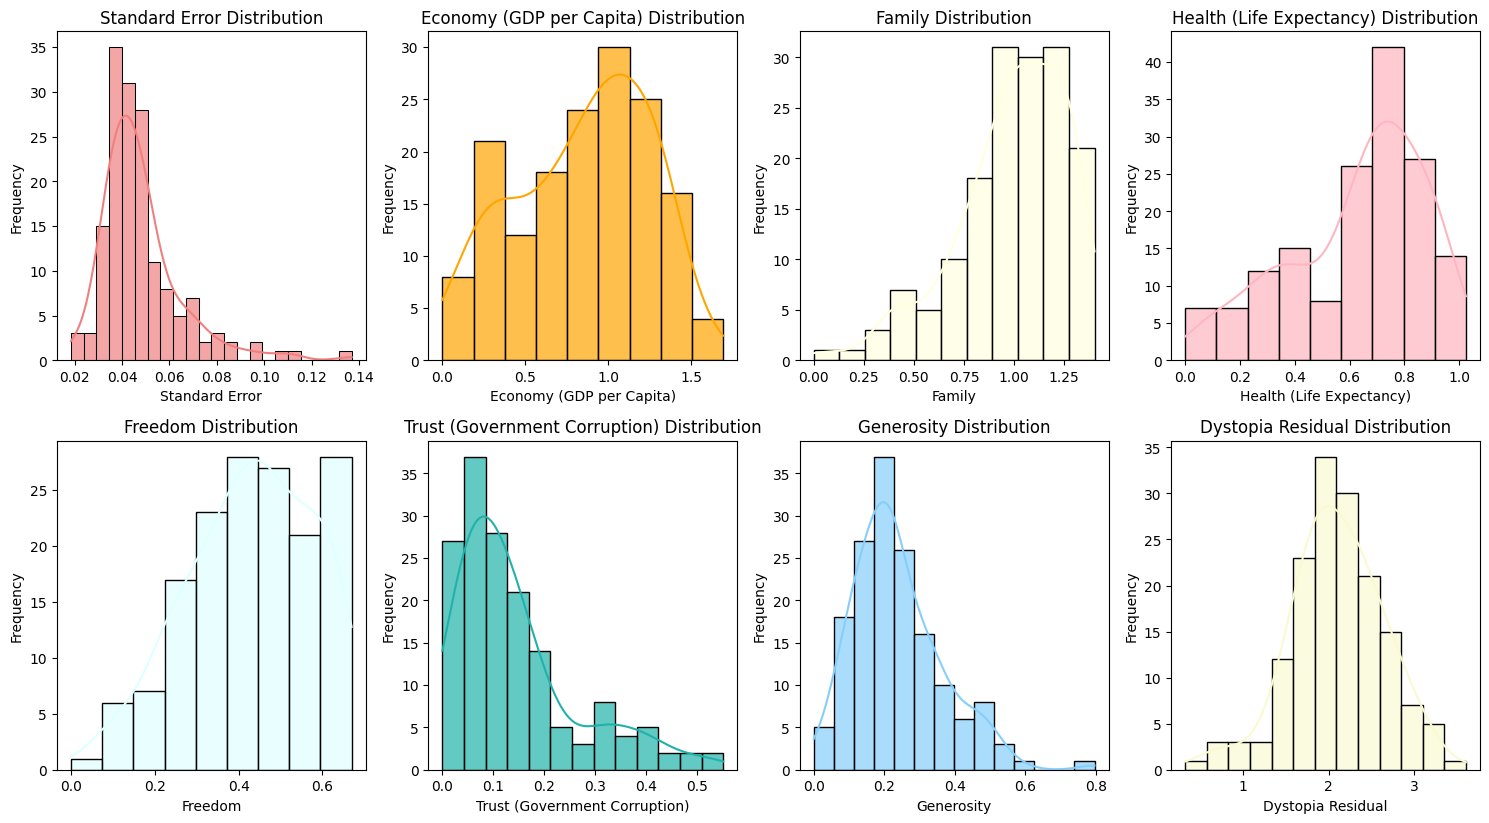

In [5111]:

plt.figure(figsize=(15, 12))

columns = ['Standard Error', 
           'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

colors = ['lightcoral', 'orange', 'lightyellow', 'lightpink', 
          'lightcyan', 'lightseagreen', 'lightskyblue', 'lightgoldenrodyellow']

for i, column in enumerate(columns):
    plt.subplot(3, 4, i+1)  
    sns.histplot(World_Happiness_2015[column], color=colors[i], kde=True, alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


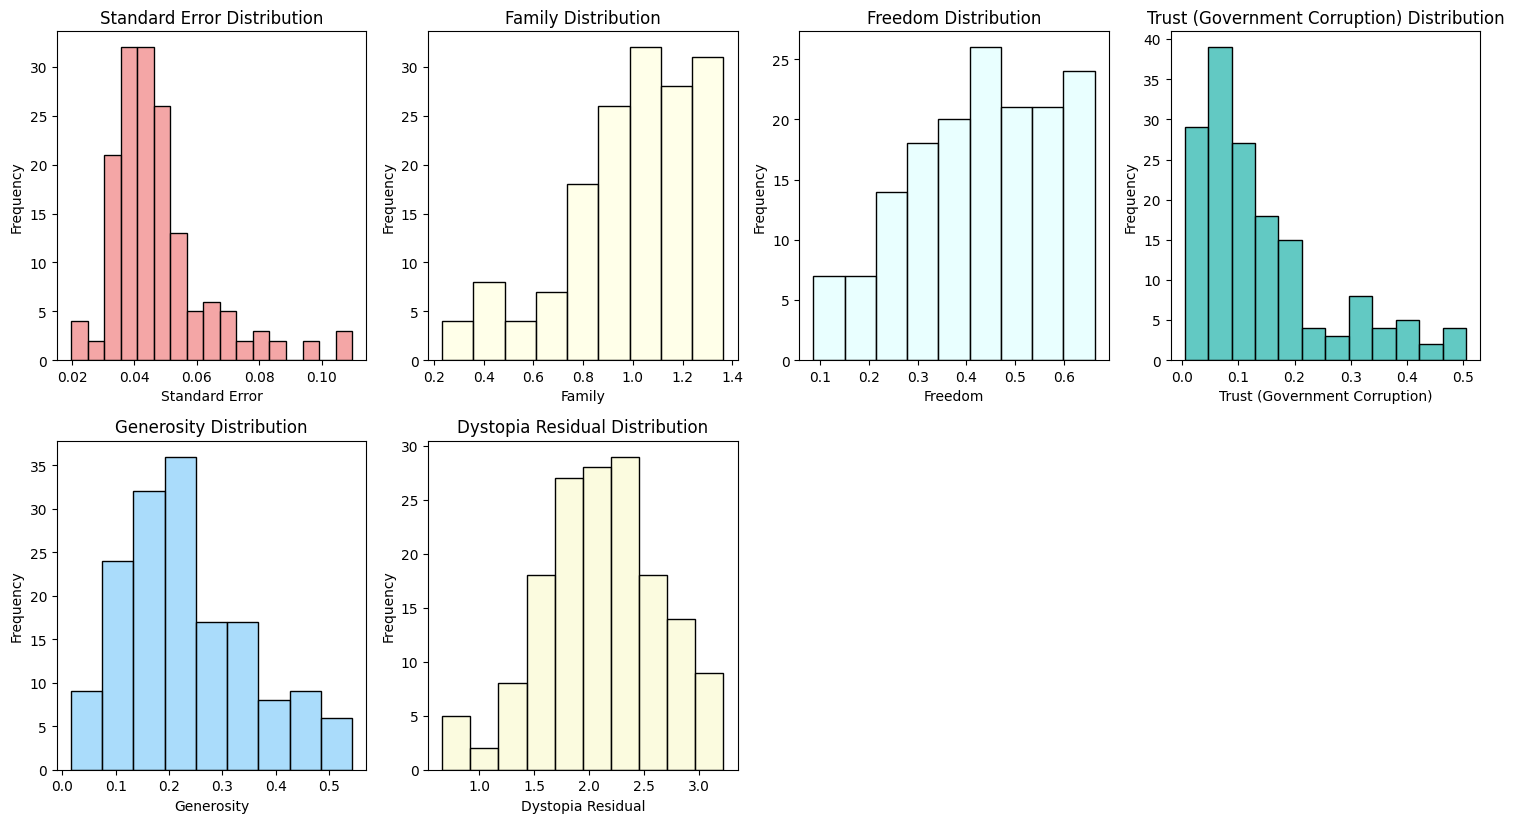

In [5112]:
def carpet_outliers(data, lower_percentile=0.01, upper_percentile=0.99):
    lower_limit = data.quantile(lower_percentile)
    upper_limit = data.quantile(upper_percentile)
    data = data.clip(lower=lower_limit, upper=upper_limit)
    return data

plt.figure(figsize=(15, 12))

columns = [ 'Standard Error', 'Family', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

colors = ['lightcoral', 'lightyellow', 
          'lightcyan', 'lightseagreen', 'lightskyblue', 'lightgoldenrodyellow']

for i, column in enumerate(columns):
    plt.subplot(3, 4, i+1)
    cleaned_data = carpet_outliers(World_Happiness_2015[column])
    sns.histplot(cleaned_data, color=colors[i], kde=False, alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


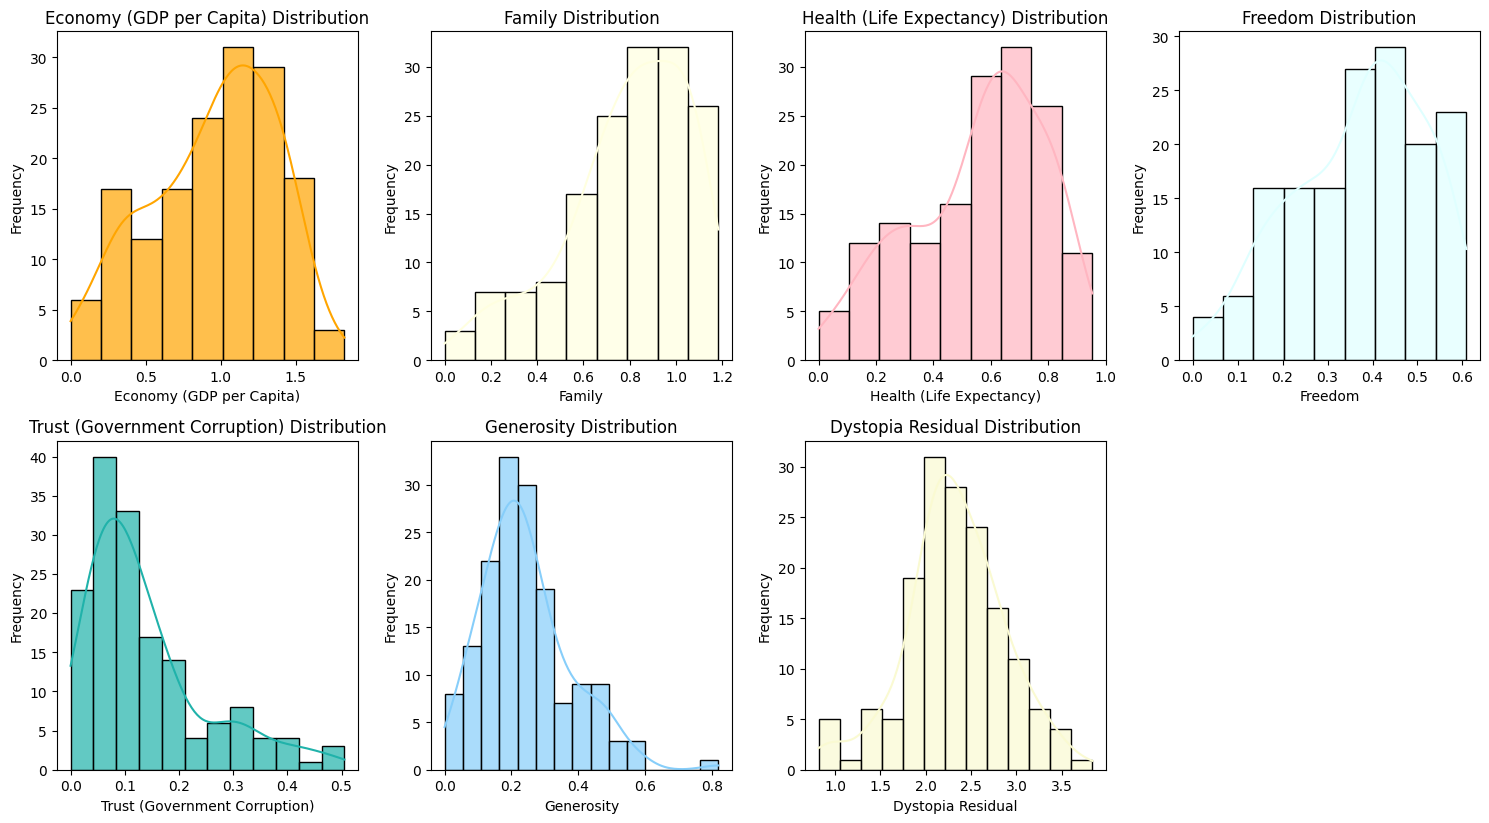

In [5113]:

plt.figure(figsize=(15, 12))

columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

colors = ['orange', 'lightyellow', 'lightpink', 
          'lightcyan', 'lightseagreen', 'lightskyblue', 'lightgoldenrodyellow']

for i, column in enumerate(columns):
    plt.subplot(3, 4, i+1)  
    sns.histplot(World_Happiness_2016[column], color=colors[i], kde=True, alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


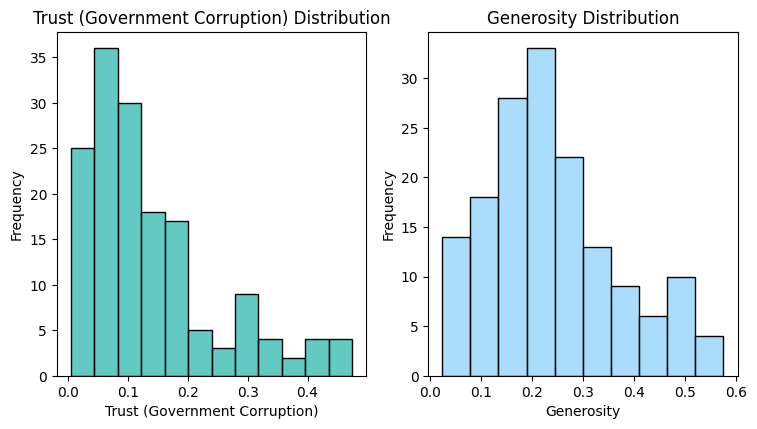

In [5114]:
def carpet_outliers(data, lower_percentile=0.01, upper_percentile=0.99):
    lower_limit = data.quantile(lower_percentile)
    upper_limit = data.quantile(upper_percentile)
    data = data.clip(lower=lower_limit, upper=upper_limit)
    return data

plt.figure(figsize=(15, 12))

columns = ['Trust (Government Corruption)', 'Generosity']

colors = ['lightseagreen', 'lightskyblue']

for i, column in enumerate(columns):
    plt.subplot(3, 4, i+1)
    cleaned_data = carpet_outliers(World_Happiness_2016[column])
    sns.histplot(cleaned_data, color=colors[i], kde=False, alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

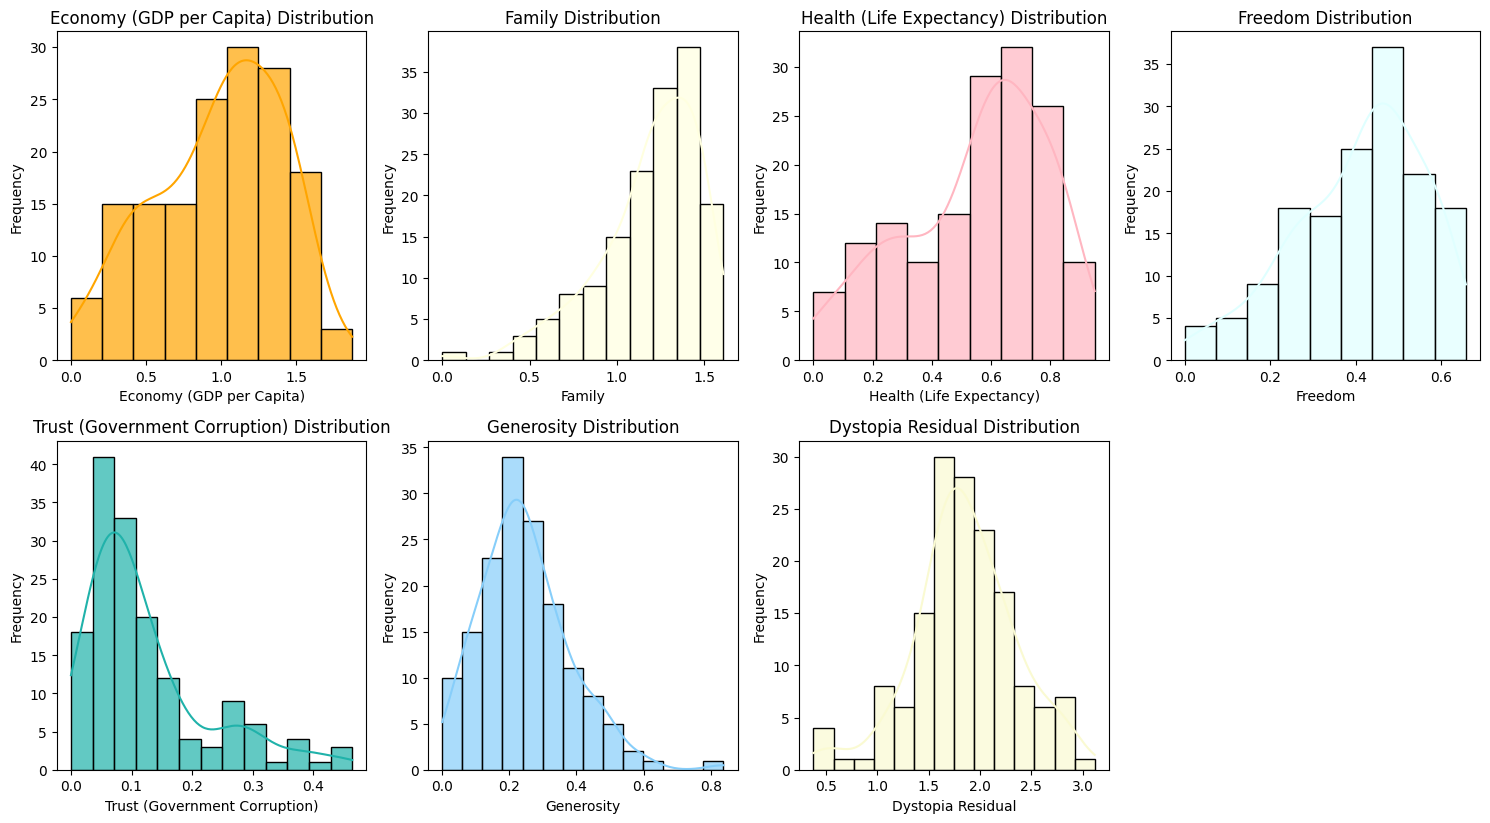

In [5116]:

plt.figure(figsize=(15, 12))

columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

colors = ['orange', 'lightyellow', 'lightpink', 
          'lightcyan', 'lightseagreen', 'lightskyblue', 'lightgoldenrodyellow']

for i, column in enumerate(columns):
    plt.subplot(3, 4, i+1)  
    sns.histplot(World_Happiness_2017[column], color=colors[i], kde=True, alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

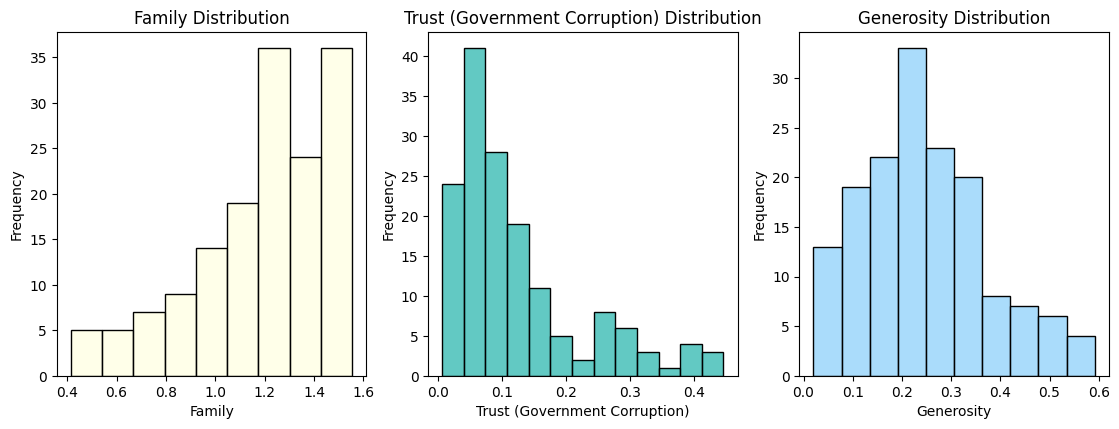

In [5117]:
def carpet_outliers(data, lower_percentile=0.01, upper_percentile=0.99):
    lower_limit = data.quantile(lower_percentile)
    upper_limit = data.quantile(upper_percentile)
    data = data.clip(lower=lower_limit, upper=upper_limit)
    return data

plt.figure(figsize=(15, 12))

columns = ['Family','Trust (Government Corruption)', 'Generosity']

colors = ['lightyellow','lightseagreen', 'lightskyblue']

for i, column in enumerate(columns):
    plt.subplot(3, 4, i+1)
    cleaned_data = carpet_outliers(World_Happiness_2017[column])
    sns.histplot(cleaned_data, color=colors[i], kde=False, alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

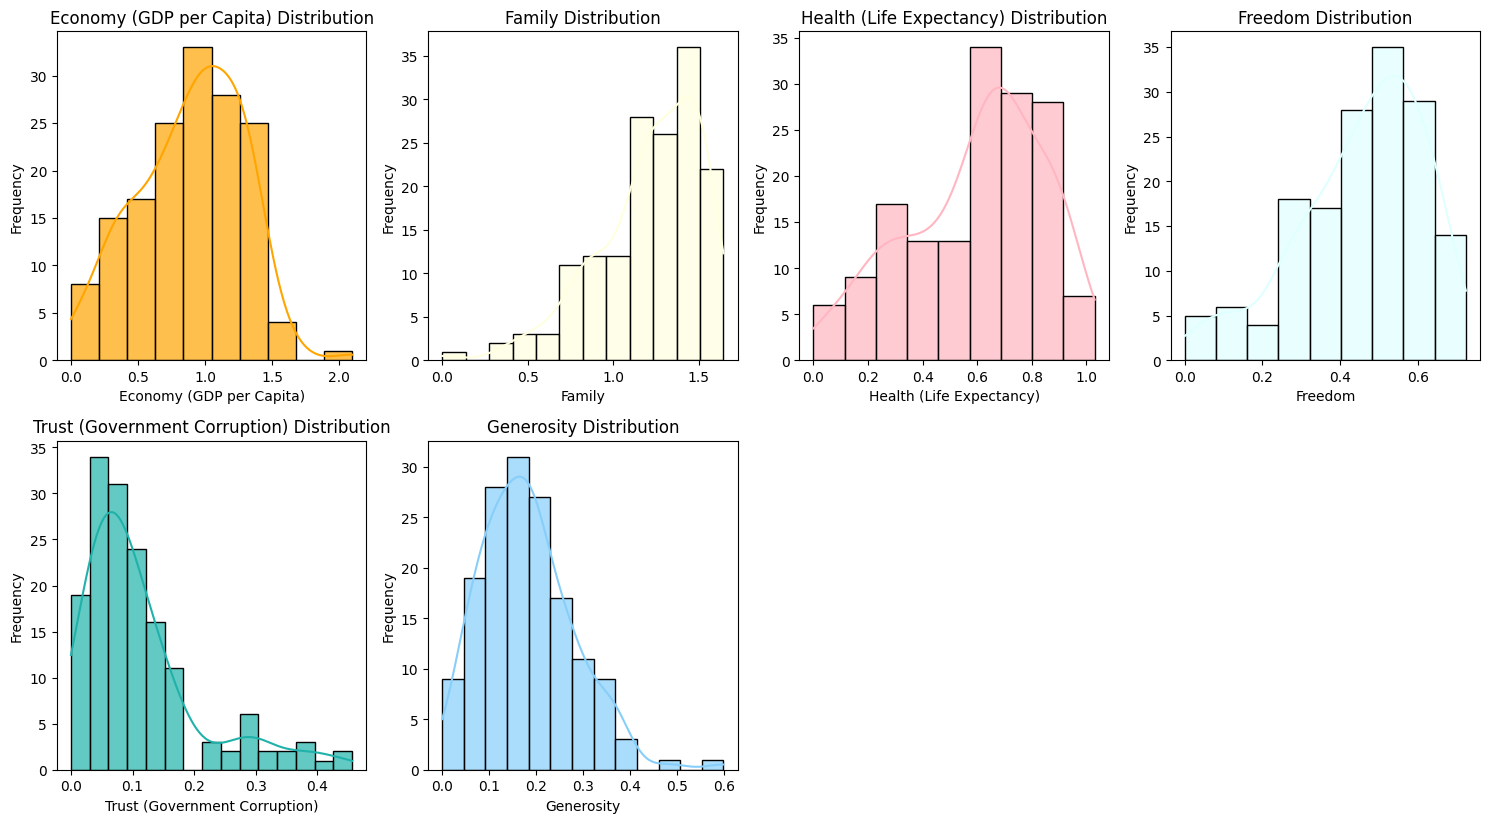

In [ ]:

plt.figure(figsize=(15, 12))

columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity']

colors = ['orange', 'lightyellow', 'lightpink', 
          'lightcyan', 'lightseagreen', 'lightskyblue']

for i, column in enumerate(columns):
    plt.subplot(3, 4, i+1)  
    sns.histplot(World_Happiness_2018[column], color=colors[i], kde=True, alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

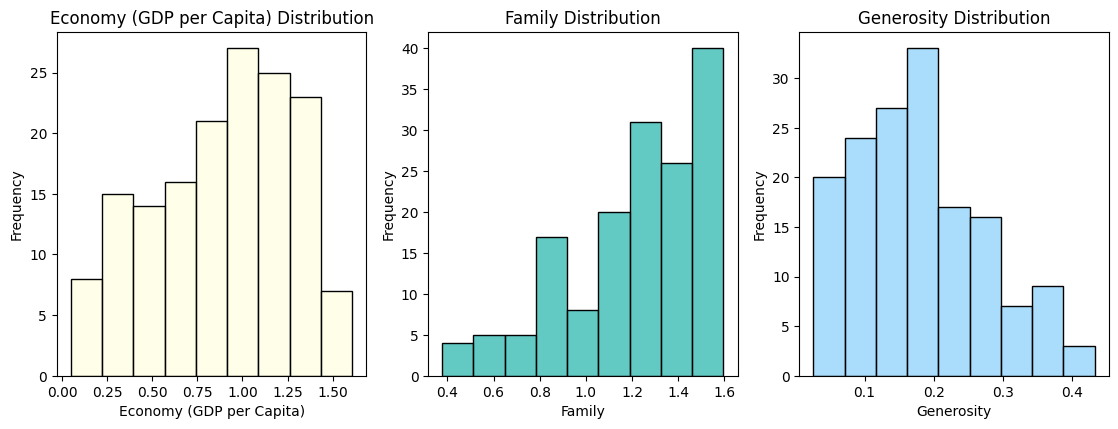

In [5121]:
def carpet_outliers(data, lower_percentile=0.01, upper_percentile=0.99):
    lower_limit = data.quantile(lower_percentile)
    upper_limit = data.quantile(upper_percentile)
    data = data.clip(lower=lower_limit, upper=upper_limit)
    return data

plt.figure(figsize=(15, 12))

columns = ['Economy (GDP per Capita)', 'Family', 'Generosity']

colors = ['lightyellow','lightseagreen', 'lightskyblue']

for i, column in enumerate(columns):
    plt.subplot(3, 4, i+1)
    cleaned_data = carpet_outliers(World_Happiness_2018[column])
    sns.histplot(cleaned_data, color=colors[i], kde=False, alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

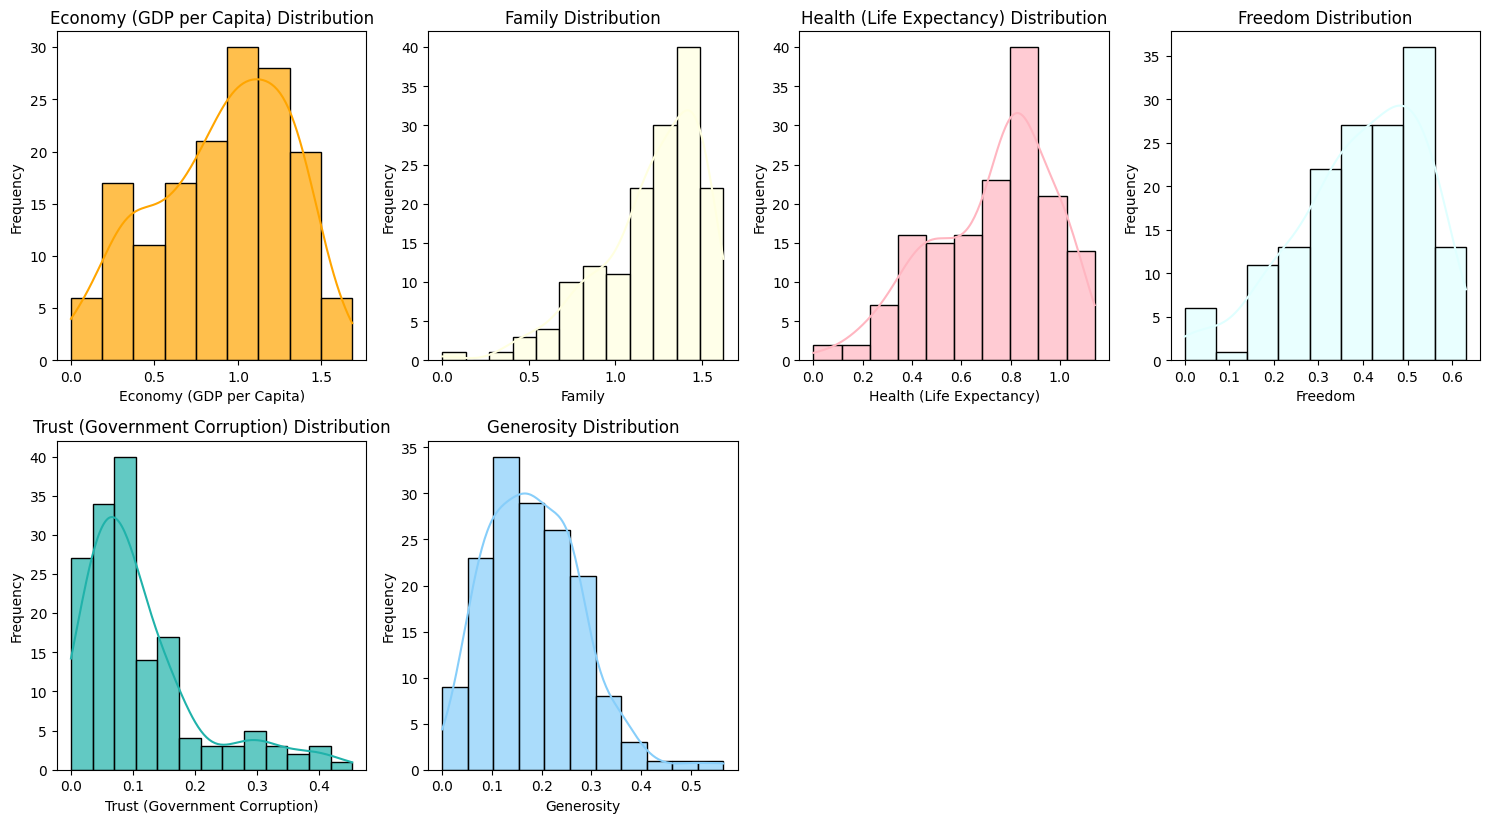

In [5122]:

plt.figure(figsize=(15, 12))

columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity']

colors = ['orange', 'lightyellow', 'lightpink', 
          'lightcyan', 'lightseagreen', 'lightskyblue']

for i, column in enumerate(columns):
    plt.subplot(3, 4, i+1)  
    sns.histplot(World_Happiness_2019[column], color=colors[i], kde=True, alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

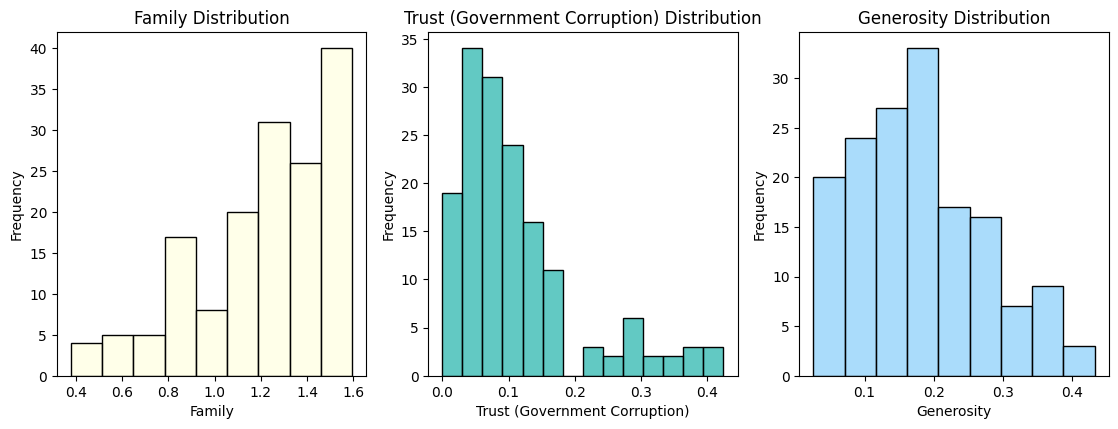

In [5123]:
def carpet_outliers(data, lower_percentile=0.01, upper_percentile=0.99):
    lower_limit = data.quantile(lower_percentile)
    upper_limit = data.quantile(upper_percentile)
    data = data.clip(lower=lower_limit, upper=upper_limit)
    return data

plt.figure(figsize=(15, 12))

columns = [ 'Family','Trust (Government Corruption)', 'Generosity']

colors = ['lightyellow', 'lightseagreen', 'lightskyblue']

for i, column in enumerate(columns):
    plt.subplot(3, 4, i+1)
    cleaned_data = carpet_outliers(World_Happiness_2018[column])
    sns.histplot(cleaned_data, color=colors[i], kde=False, alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [ ]:
print("Happiness Score Overview:")
print(f"-------------------------------------------------------------------")
print(f"Yearly Average Happiness Scores:")
print(f"  2015: {World_Happiness_2015['Happiness Score'].mean():.2f}")
print(f"  2016: {World_Happiness_2016['Happiness Score'].mean():.2f}")
print(f"  2017: {World_Happiness_2017['Happiness Score_2017'].mean():.2f}")
print(f"  2018: {World_Happiness_2018['Happiness Score_2018'].mean():.2f}")
print(f"  2019: {World_Happiness_2019['Happiness Score_2019'].mean():.2f}")

print(f"\n-------------------------------------------------------------------")
print(f"Standard Deviation of Happiness Scores:")
print(f"  2015: {World_Happiness_2015['Happiness Score'].std():.2f}")
print(f"  2016: {World_Happiness_2016['Happiness Score'].std():.2f}")
print(f"  2017: {World_Happiness_2017['Happiness Score_2017'].std():.2f}")
print(f"  2018: {World_Happiness_2018['Happiness Score_2018'].std():.2f}")
print(f"  2019: {World_Happiness_2019['Happiness Score_2019'].std():.2f}")

print(f"-------------------------------------------------------------------")


Happiness Score Overview:
-------------------------------------------------------------------
Yearly Average Happiness Scores:
  2015: 5.38
  2016: 5.38
  2017: 5.35
  2018: 5.38
  2019: 5.41

-------------------------------------------------------------------
Standard Deviation of Happiness Scores:
  2015: 1.15
  2016: 1.14
  2017: 1.13
  2018: 1.12
  2019: 1.11
-------------------------------------------------------------------


In [ ]:


quantile_80_2015 = np.quantile(World_Happiness_2015['Happiness Score'], 0.80)
quantile_80_2016 = np.quantile(World_Happiness_2016['Happiness Score'], 0.80)
quantile_80_2017 = np.quantile(World_Happiness_2017['Happiness Score_2017'], 0.80)
quantile_80_2018 = np.quantile(World_Happiness_2018['Happiness Score_2018'], 0.80)
quantile_80_2019 = np.quantile(World_Happiness_2019['Happiness Score_2019'], 0.80)

print("80th Percentile of Happiness Scores Across Years:")
print(f"  2015: {quantile_80_2015:.2f} ")
print(f"  2016: {quantile_80_2016:.2f} ")
print(f"  2017: {quantile_80_2017:.2f} ")
print(f"  2018: {quantile_80_2018:.2f} ")
print(f"  2019: {quantile_80_2019:.2f} ")



80th Percentile of Happiness Scores Across Years:
  2015: 6.48 
  2016: 6.48 
  2017: 6.43 
  2018: 6.37 
  2019: 6.30 


In [5124]:
World_Happiness_2015.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.500000,45.754781,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [5127]:
World_Happiness_2015.describe(include='object').T

,count,unique,top,freq
Country,158,158,Switzerland,1
Region,158,10,Sub-Saharan Africa,40


In [5125]:
World_Happiness_2016.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,157.0,79.000000,45.466105,1.00000,40.00000,79.00000,118.00000,157.00000
Happiness Score,157.0,5.382185,1.141674,2.90500,4.40400,5.31400,6.26900,7.52600
Lower Confidence Interval,157.0,5.282395,1.148043,2.73200,4.32700,5.23700,6.15400,7.46000
Upper Confidence Interval,157.0,5.481975,1.136493,3.07800,4.46500,5.41900,6.43400,7.66900
Economy (GDP per Capita),157.0,0.953880,0.412595,0.00000,0.67024,1.02780,1.27964,1.82427
Family,157.0,0.793621,0.266706,0.00000,0.64184,0.84142,1.02152,1.18326
Health (Life Expectancy),157.0,0.557619,0.229349,0.00000,0.38291,0.59659,0.72993,0.95277
Freedom,157.0,0.370994,0.145507,0.00000,0.25748,0.39747,0.48453,0.60848
Trust (Government Corruption),157.0,0.137624,0.111038,0.00000,0.06126,0.10547,0.17554,0.50521
Generosity,157.0,0.242635,0.133756,0.00000,0.15457,0.22245,0.31185,0.81971


In [5126]:
World_Happiness_2016.describe(include='object').T

,count,unique,top,freq
Country,157,157,Denmark,1
Region,157,10,Sub-Saharan Africa,38


In [5129]:
World_Happiness_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness Score_2017,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Upper Confidence Interval,155.0,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
Lower Confidence Interval,155.0,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
Economy (GDP per Capita),155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
Family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health (Life Expectancy),155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
Trust (Government Corruption),155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308


In [5130]:
World_Happiness_2017.describe(include='object').T

,count,unique,top,freq
Country,155,155,Norway,1


In [5131]:
World_Happiness_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Happiness Score_2018,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
Economy (GDP per Capita),156.0,0.891449,0.391921,0.000,0.61625,0.9495,1.19775,2.096
Family,156.0,1.213237,0.302372,0.000,1.06675,1.2550,1.46300,1.644
Health (Life Expectancy),156.0,0.597346,0.247579,0.000,0.42225,0.6440,0.77725,1.030
Freedom,156.0,0.454506,0.162424,0.000,0.35600,0.4870,0.57850,0.724
Generosity,156.0,0.181006,0.098471,0.000,0.10950,0.1740,0.23900,0.598
Trust (Government Corruption),156.0,0.111282,0.096597,0.000,0.05075,0.0820,0.13650,0.457


In [5132]:
World_Happiness_2019.describe(include='object').T

,count,unique,top,freq
Country,156,156,Finland,1


In [5133]:
World_Happiness_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Happiness Score_2019,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
Economy (GDP per Capita),156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Family,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Health (Life Expectancy),156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Trust (Government Corruption),156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [5134]:
World_Happiness_2019.describe(include='object').T

,count,unique,top,freq
Country,156,156,Finland,1


In [5138]:
World_Happiness_2019.head()

,Overall rank,Country,Happiness Score_2019,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

### What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness?

In [ ]:
World_Happiness_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [ ]:
World_Happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


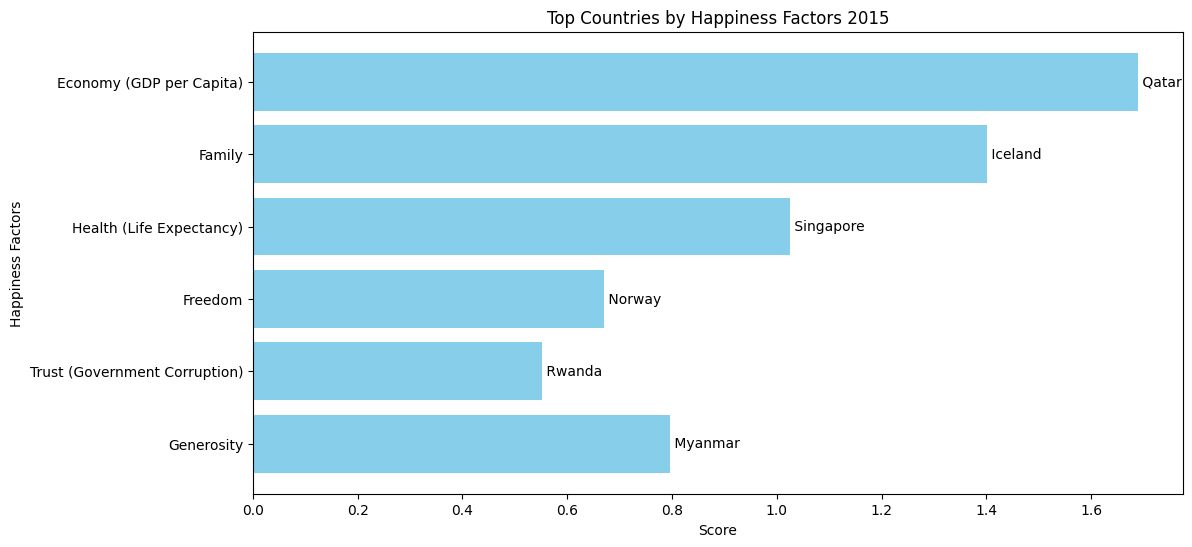

In [ ]:
# Extracting top country factors
factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity']

top_countries_df = pd.DataFrame({
    "Factor": factors,
    "Top Country": World_Happiness_2015.loc[World_Happiness_2015[factors].idxmax(), 'Country'].values,
    "Score": World_Happiness_2015[factors].max().values
})

# Creating a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(top_countries_df["Factor"], top_countries_df["Score"], color="skyblue")
ax.set_xlabel("Score")
ax.set_ylabel("Happiness Factors")
ax.set_title("Top Countries by Happiness Factors 2015")
ax.invert_yaxis()

# Annotating bars with country names
for i, v in enumerate(top_countries_df["Score"]):
    ax.text(v, i, f" {top_countries_df['Top Country'][i]}", va="center", fontsize=10)

plt.show()

In [ ]:
World_Happiness_2016.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [ ]:
World_Happiness_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
top_countries_df

,Factor,Top Country,Score
0,Economy (GDP per Capita),Qatar,1.69042
1,Family,Iceland,1.40223
2,Health (Life Expectancy),Singapore,1.02525
3,Freedom,Norway,0.66973
4,Trust (Government Corruption),Rwanda,0.55191
5,Generosity,Myanmar,0.79588


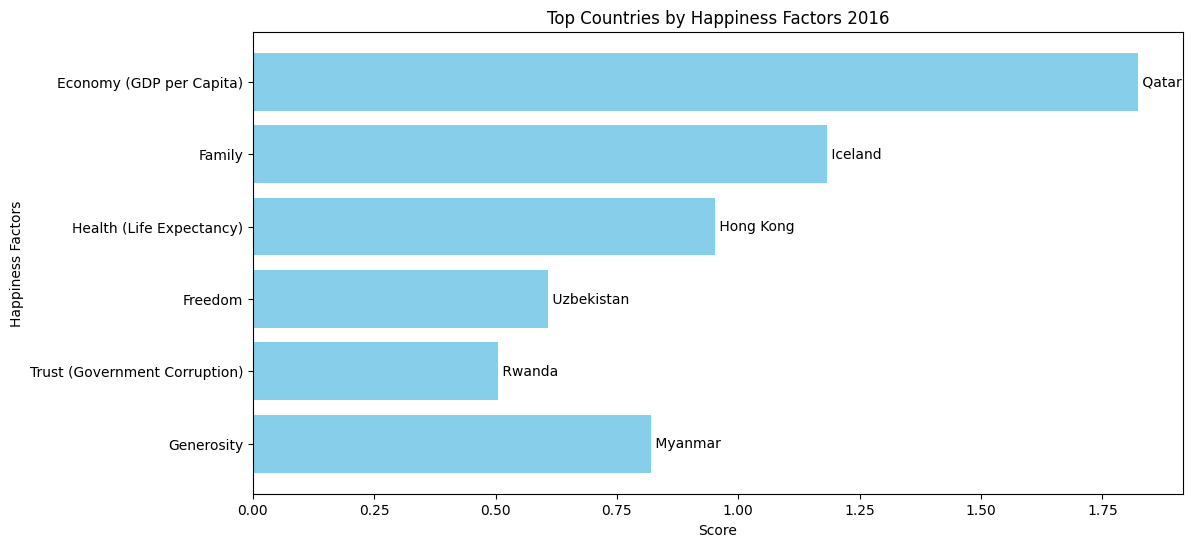

In [ ]:
# Extracting top country factors
factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity']

top_countries_df = pd.DataFrame({
    "Factor": factors,
    "Top Country": World_Happiness_2016.loc[World_Happiness_2016[factors].idxmax(), 'Country'].values,
    "Score": World_Happiness_2016[factors].max().values
})

# Creating a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(top_countries_df["Factor"], top_countries_df["Score"], color="skyblue")
ax.set_xlabel("Score")
ax.set_ylabel("Happiness Factors")
ax.set_title("Top Countries by Happiness Factors 2016")
ax.invert_yaxis()

# Annotating bars with country names
for i, v in enumerate(top_countries_df["Score"]):
    ax.text(v, i, f" {top_countries_df['Top Country'][i]}", va="center", fontsize=10)

plt.show()

In [ ]:
World_Happiness_2017.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score_2017             float64
Upper Confidence Interval        float64
Lower Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
dtype: object

In [ ]:
World_Happiness_2017.head()

,Country,Happiness Rank,Happiness Score_2017,Upper Confidence Interval,Lower Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
World_Happiness_2017.columns

Index(['Country', 'Happiness Rank', 'Happiness Score_2017',
       'Upper Confidence Interval', 'Lower Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Dystopia Residual'],
      dtype='object')

In [ ]:
top_countries_df

,Factor,Top Country,Score
0,Economy (GDP per Capita),Qatar,1.82427
1,Family,Iceland,1.18326
2,Health (Life Expectancy),Hong Kong,0.95277
3,Freedom,Uzbekistan,0.60848
4,Trust (Government Corruption),Rwanda,0.50521
5,Generosity,Myanmar,0.81971


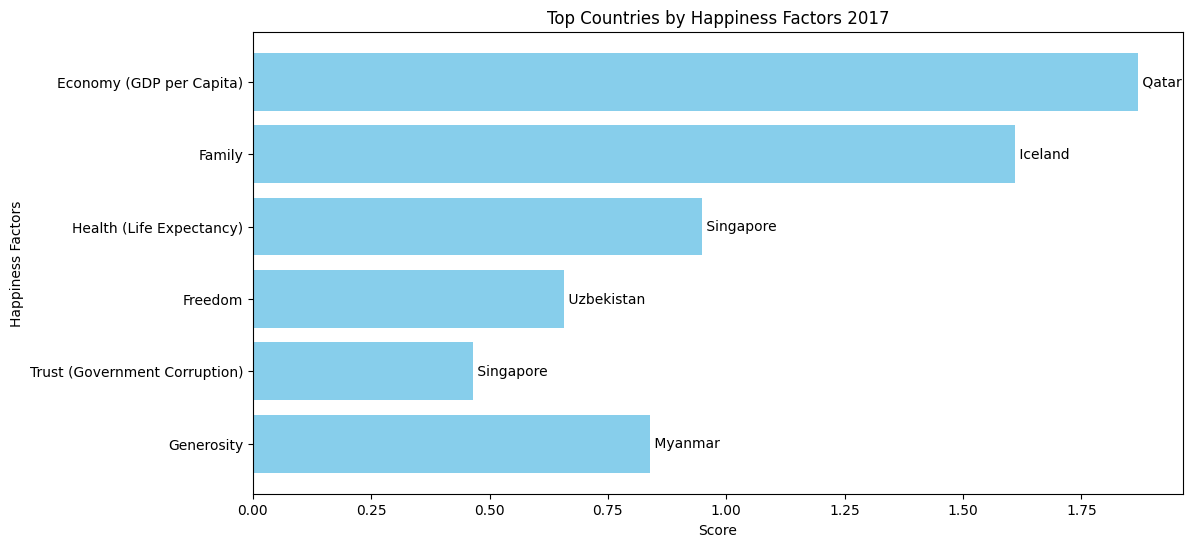

In [ ]:
# Extracting top country factors
factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity']

top_countries_df = pd.DataFrame({
    "Factor": factors,
    "Top Country": World_Happiness_2017.loc[World_Happiness_2017[factors].idxmax(), 'Country'].values,
    "Score": World_Happiness_2017[factors].max().values
})

# Creating a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(top_countries_df["Factor"], top_countries_df["Score"], color="skyblue")
ax.set_xlabel("Score")
ax.set_ylabel("Happiness Factors")
ax.set_title("Top Countries by Happiness Factors 2017")
ax.invert_yaxis()

# Annotating bars with country names
for i, v in enumerate(top_countries_df["Score"]):
    ax.text(v, i, f" {top_countries_df['Top Country'][i]}", va="center", fontsize=10)

plt.show()

In [ ]:
World_Happiness_2018.dtypes

Overall rank                       int64
Country                           object
Happiness Score_2018             float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)     object
dtype: object

In [ ]:
World_Happiness_2018.head()

,Overall rank,Country,Happiness Score_2018,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.34
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [ ]:
World_Happiness_2018.columns

Index(['Overall rank', 'Country', 'Happiness Score_2018',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)'],
      dtype='object')

In [ ]:
sorted_2018 = World_Happiness_2018[["Economy (GDP per Capita)", "Country"]].sort_values(by="Economy (GDP per Capita)", ascending=False)
sorted_2018

,Economy (GDP per Capita),Country
19,2.096,United Arab Emirates
31,1.649,Qatar
16,1.576,Luxembourg
33,1.529,Singapore
44,1.474,Kuwait
...,...,...
155,0.091,Burundi
148,0.076,Liberia
131,0.069,Congo (Kinshasa)
154,0.024,Central African Republic


In [ ]:
World_Happiness_2018[World_Happiness_2018["Country"] == "United Arab Emirates"]

,Overall rank,Country,Happiness Score_2018,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,0.000


In [ ]:
World_Happiness_2018[World_Happiness_2018["Country"] == "Qatar"]

,Overall rank,Country,Happiness Score_2018,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
31,32,Qatar,6.374,1.649,1.303,0.748,0.654,0.256,0.171


In [ ]:
top_countries_df

,Factor,Top Country,Score
0,Economy (GDP per Capita),Qatar,1.870766
1,Family,Iceland,1.610574
2,Health (Life Expectancy),Singapore,0.949492
3,Freedom,Uzbekistan,0.658249
4,Trust (Government Corruption),Singapore,0.464308
5,Generosity,Myanmar,0.838075


In [ ]:
World_Happiness_2018[["Trust (Government Corruption)"]]


,Trust (Government Corruption)
0,0.393
1,0.34
2,0.408
3,0.138
4,0.357
...,...
151,0.064
152,0.097
153,0.106
154,0.038


In [ ]:
World_Happiness_2018.dtypes

Overall rank                       int64
Country                           object
Happiness Score_2018             float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)     object
dtype: object

In [ ]:
World_Happiness_2018["Trust (Government Corruption)"] = World_Happiness_2018["Trust (Government Corruption)"].astype(float)

In [ ]:
World_Happiness_2018.dtypes

Overall rank                       int64
Country                           object
Happiness Score_2018             float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
dtype: object

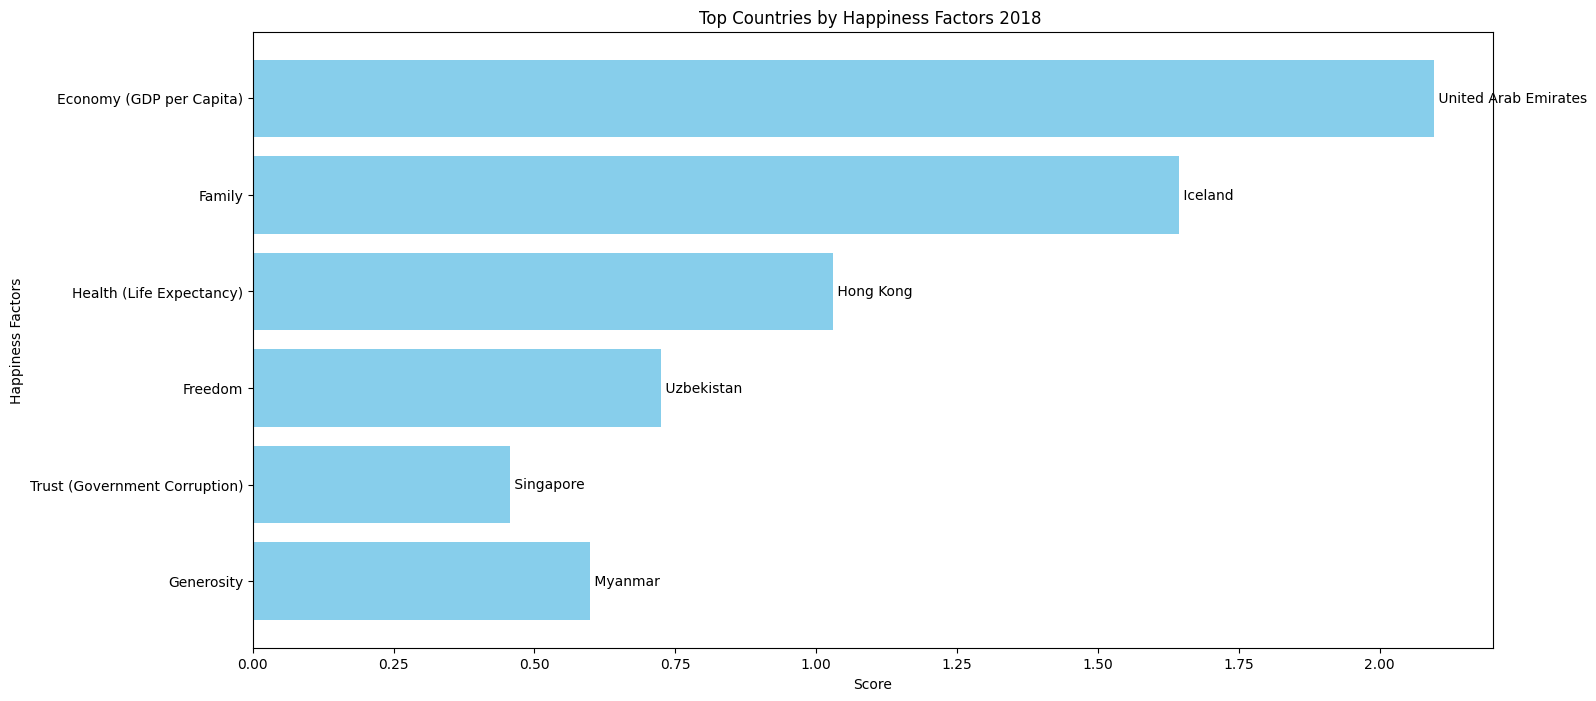

In [ ]:
# Extracting top country factors
factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity']

top_countries_df = pd.DataFrame({
    "Factor": factors,
    "Top Country": World_Happiness_2018.loc[World_Happiness_2018[factors].idxmax(), 'Country'].values,
    "Score": World_Happiness_2018[factors].max().values
})

# Creating a bar chart
fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(top_countries_df["Factor"], top_countries_df["Score"], color="skyblue")
ax.set_xlabel("Score")
ax.set_ylabel("Happiness Factors")
ax.set_title("Top Countries by Happiness Factors 2018 ")
ax.invert_yaxis()

# Annotating bars with country names
for i, v in enumerate(top_countries_df["Score"]):
    ax.text(v, i, f" {top_countries_df['Top Country'][i]}", va="center", fontsize=10)

plt.show()

In [ ]:
World_Happiness_2019.head()

,Overall rank,Country,Happiness Score_2019,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
World_Happiness_2019.columns

Index(['Overall rank', 'Country', 'Happiness Score_2019',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)'],
      dtype='object')

In [ ]:
sorted_2018 = World_Happiness_2019[["Economy (GDP per Capita)", "Country"]].sort_values(by="Economy (GDP per Capita)", ascending=False)
sorted_2018

,Economy (GDP per Capita),Country
28,1.684,Qatar
13,1.609,Luxembourg
33,1.572,Singapore
20,1.503,United Arab Emirates
50,1.500,Kuwait
...,...,...
126,0.094,Congo (Kinshasa)
140,0.073,Liberia
144,0.046,Burundi
154,0.026,Central African Republic


In [ ]:
World_Happiness_2019[World_Happiness_2019["Country"] == "United Arab Emirates"]

,Overall rank,Country,Happiness Score_2019,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
20,21,United Arab Emirates,6.825,1.503,1.31,0.825,0.598,0.262,0.182


In [ ]:
World_Happiness_2019[World_Happiness_2019["Country"] == "Qatar"]

,Overall rank,Country,Happiness Score_2019,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.22,0.167


In [ ]:
top_countries_df

,Factor,Top Country,Score
0,Economy (GDP per Capita),United Arab Emirates,2.096
1,Family,Iceland,1.644
2,Health (Life Expectancy),Hong Kong,1.030
3,Freedom,Uzbekistan,0.724
4,Trust (Government Corruption),Singapore,0.457
5,Generosity,Myanmar,0.598


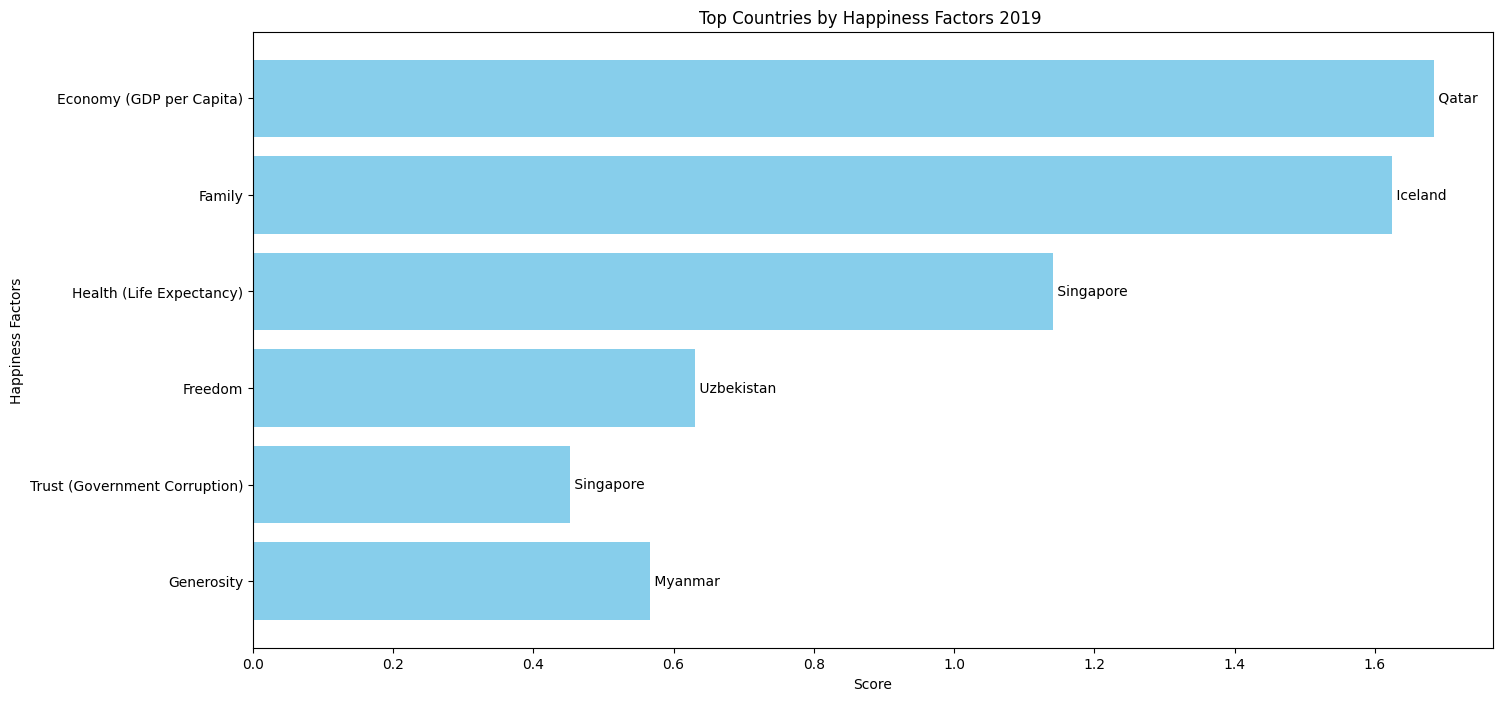

In [ ]:
# Extracting top country factors
factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Trust (Government Corruption)', 'Generosity']

top_countries_df = pd.DataFrame({
    "Factor": factors,
    "Top Country": World_Happiness_2019.loc[World_Happiness_2019[factors].idxmax(), 'Country'].values,
    "Score": World_Happiness_2019[factors].max().values
})

# Creating a bar chart
fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(top_countries_df["Factor"], top_countries_df["Score"], color="skyblue")
ax.set_xlabel("Score")
ax.set_ylabel("Happiness Factors")
ax.set_title("Top Countries by Happiness Factors 2019 ")
ax.invert_yaxis()

# Annotating bars with country names
for i, v in enumerate(top_countries_df["Score"]):
    ax.text(v, i, f" {top_countries_df['Top Country'][i]}", va="center", fontsize=10)

plt.show()

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports?

In [ ]:
World_Happiness_2017.head(1)

,Country,Happiness Rank,Happiness Score_2017,Upper Confidence Interval,Lower Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


In [ ]:
print(df_merged.columns)


Index(['Country', 'Region', 'Happiness Score_2015',
       'Economy (GDP per Capita)_2015', 'Family_2015',
       'Health (Life Expectancy)_2015', 'Freedom_2015', 'Generosity_2015',
       'Trust (Government Corruption)_2015', 'Happiness Score_2016',
       'Economy (GDP per Capita)_2016', 'Family_2016',
       'Health (Life Expectancy)_2016', 'Freedom_2016', 'Generosity_2016',
       'Trust (Government Corruption)_2016', 'Happiness Score_2017',
       'Economy (GDP per Capita)_x', 'Family_x', 'Health (Life Expectancy)_x',
       'Freedom_x', 'Generosity_x', 'Trust (Government Corruption)_x',
       'Happiness Score_2018', 'Economy (GDP per Capita)_y', 'Family_y',
       'Health (Life Expectancy)_y', 'Freedom_y', 'Generosity_y',
       'Trust (Government Corruption)_y', 'Happiness Score_2019',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Score Change 2015-2019', 'Score Change 2016-2019'

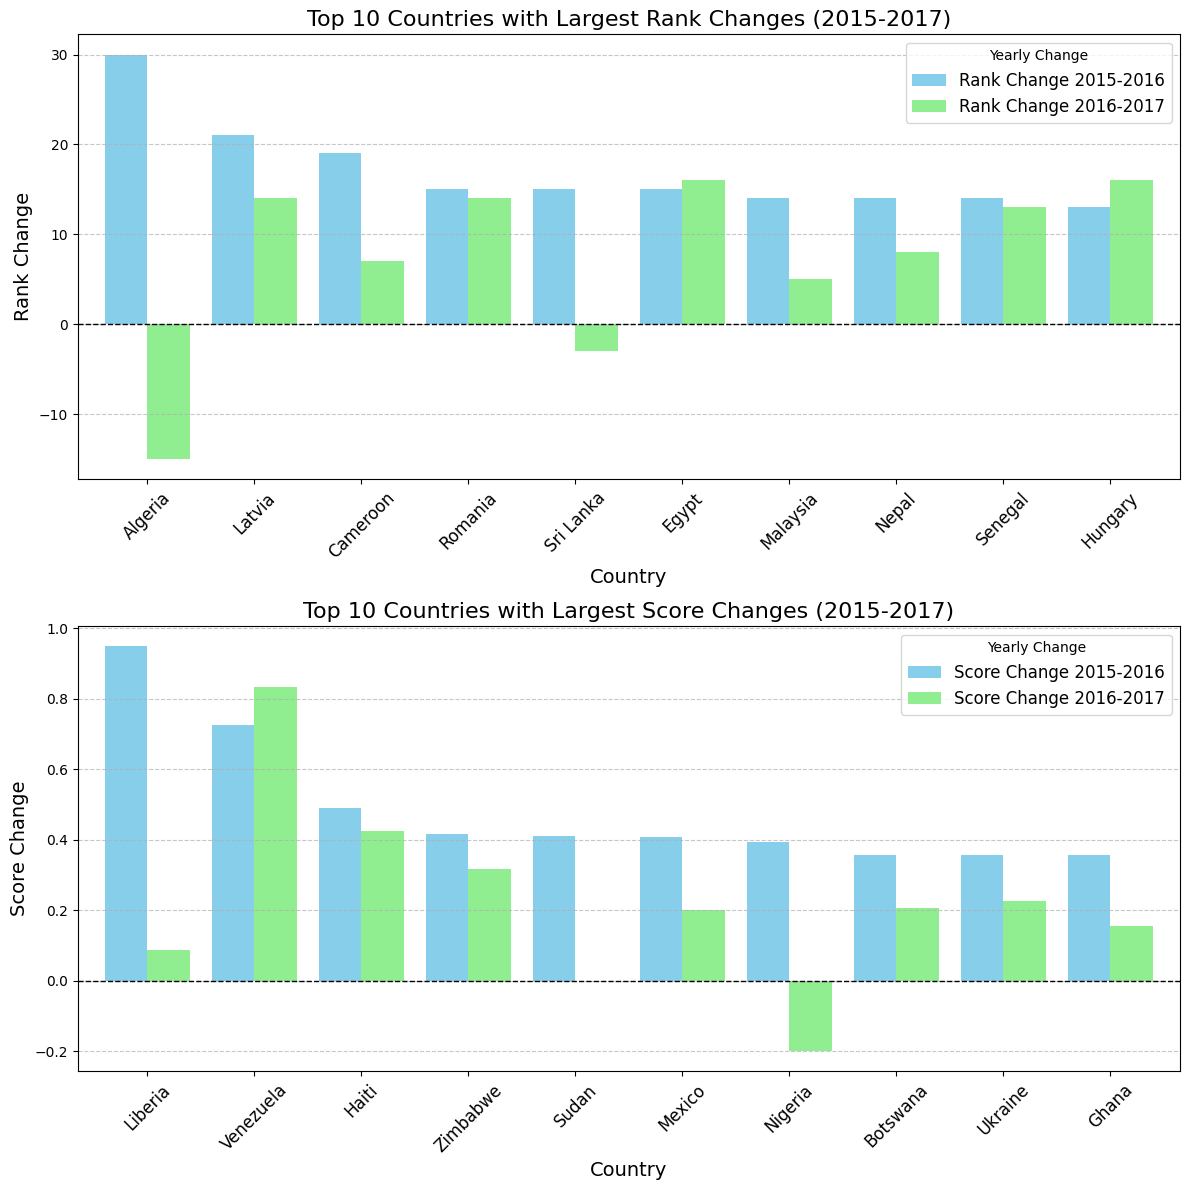

In [ ]:


df_merged = World_Happiness_2015.merge(World_Happiness_2016, on='Country', how='inner').merge(World_Happiness_2017, on='Country', how='inner')


df_merged['Rank Change 2015-2016'] = df_merged['Happiness Rank_x'] - df_merged['Happiness Rank_y']
df_merged['Rank Change 2016-2017'] = df_merged['Happiness Rank_y'] - df_merged['Happiness Rank']
df_merged['Score Change 2015-2016'] = df_merged['Happiness Score_x'] - df_merged['Happiness Score_y']
df_merged['Score Change 2016-2017'] = df_merged['Happiness Score_y'] - df_merged['Happiness Score_2017']



top_countries_rank = df_merged.nlargest(10, 'Rank Change 2015-2016')[['Country', 'Rank Change 2015-2016', 'Rank Change 2016-2017']]
top_countries_score = df_merged.nlargest(10, 'Score Change 2015-2016')[['Country', 'Score Change 2015-2016', 'Score Change 2016-2017']]


colors = ['skyblue', 'lightgreen']


fig, axes = plt.subplots(2, 1, figsize=(12, 12))


bars = top_countries_rank.plot(x='Country', y=['Rank Change 2015-2016', 'Rank Change 2016-2017'], kind='bar', ax=axes[0], width=0.8, color=colors)
axes[0].axhline(0, color='black', linewidth=1, linestyle='--')
axes[0].set_title('Top 10 Countries with Largest Rank Changes (2015-2017)', fontsize=16)
axes[0].set_xlabel('Country', fontsize=14)
axes[0].set_ylabel('Rank Change', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend(title='Yearly Change', fontsize=12)


bars = top_countries_score.plot(x='Country', y=['Score Change 2015-2016', 'Score Change 2016-2017'], kind='bar', ax=axes[1], width=0.8, color=colors)
axes[1].axhline(0, color='black', linewidth=1, linestyle='--')
axes[1].set_title('Top 10 Countries with Largest Score Changes (2015-2017)', fontsize=16)
axes[1].set_xlabel('Country', fontsize=14)
axes[1].set_ylabel('Score Change', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(title='Yearly Change', fontsize=12)


plt.tight_layout()
plt.show()

### Did any country experience a significant increase or decrease in happiness?

In [5059]:
rename_18_19 = {
    "GDP per capita": "Economy (GDP per Capita)",
    "Health..Life.Expectancy.": "Health (Life Expectancy)",
    "Social support":"Family",
    "Healthy life expectancy": "Health (Life Expectancy)",
    "Freedom to make life choices":"Freedom",
    "Perceptions of corruption": "Trust (Government Corruption)",
}

World_Happiness_2018.rename(columns=rename_18_19, inplace=True)
World_Happiness_2019.rename(columns=rename_18_19, inplace=True)

In [5060]:

World_Happiness_2017.rename(columns={"Country or region": "Country", "Happiness Score": "Happiness Score_2017"}, inplace=True)
World_Happiness_2018.rename(columns={"Country or region": "Country", "Score": "Happiness Score_2018"}, inplace=True)
World_Happiness_2019.rename(columns={"Country or region": "Country", "Score": "Happiness Score_2019"}, inplace=True)

# دمج بيانات 2015 و 2016 مع كل الأعمدة
df_merged_15_16 = pd.merge(
    World_Happiness_2015[['Country', 'Region','Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']], 
    World_Happiness_2016[['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']], 
    on='Country', how='inner', suffixes=('_2015', '_2016')
)

# دمج بيانات 2017 و 2018 مع كل الأعمدة
df_merged_17_18 = pd.merge(
    World_Happiness_2017[['Country', 'Happiness Score_2017', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']], 
    World_Happiness_2018[['Country', 'Happiness Score_2018', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']], 
    on='Country', how='inner'
)

# دمج البيانات بين 2015-2016 و 2017-2018
df_merged_15_18 = pd.merge(df_merged_15_16, df_merged_17_18, 
                            on='Country', how='inner')

# دمج البيانات مع 2019
df_merged = pd.merge(
    df_merged_15_18, 
    World_Happiness_2019[['Country', 'Happiness Score_2019', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']], 
    on='Country', how='inner'
)

# عرض الأعمدة بعد الدمج للتأكد من التسمية الصحيحة
print(df_merged.columns)

# عرض البيانات المدمجة للتحقق من الشكل النهائي
print(df_merged.head())



Index(['Country', 'Region', 'Happiness Score_2015',
       'Economy (GDP per Capita)_2015', 'Family_2015',
       'Health (Life Expectancy)_2015', 'Freedom_2015', 'Generosity_2015',
       'Trust (Government Corruption)_2015', 'Happiness Score_2016',
       'Economy (GDP per Capita)_2016', 'Family_2016',
       'Health (Life Expectancy)_2016', 'Freedom_2016', 'Generosity_2016',
       'Trust (Government Corruption)_2016', 'Happiness Score_2017',
       'Economy (GDP per Capita)_x', 'Family_x', 'Health (Life Expectancy)_x',
       'Freedom_x', 'Generosity_x', 'Trust (Government Corruption)_x',
       'Happiness Score_2018', 'Economy (GDP per Capita)_y', 'Family_y',
       'Health (Life Expectancy)_y', 'Freedom_y', 'Generosity_y',
       'Trust (Government Corruption)_y', 'Happiness Score_2019',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)'],
      dtype='object')
       Country          Region  Ha

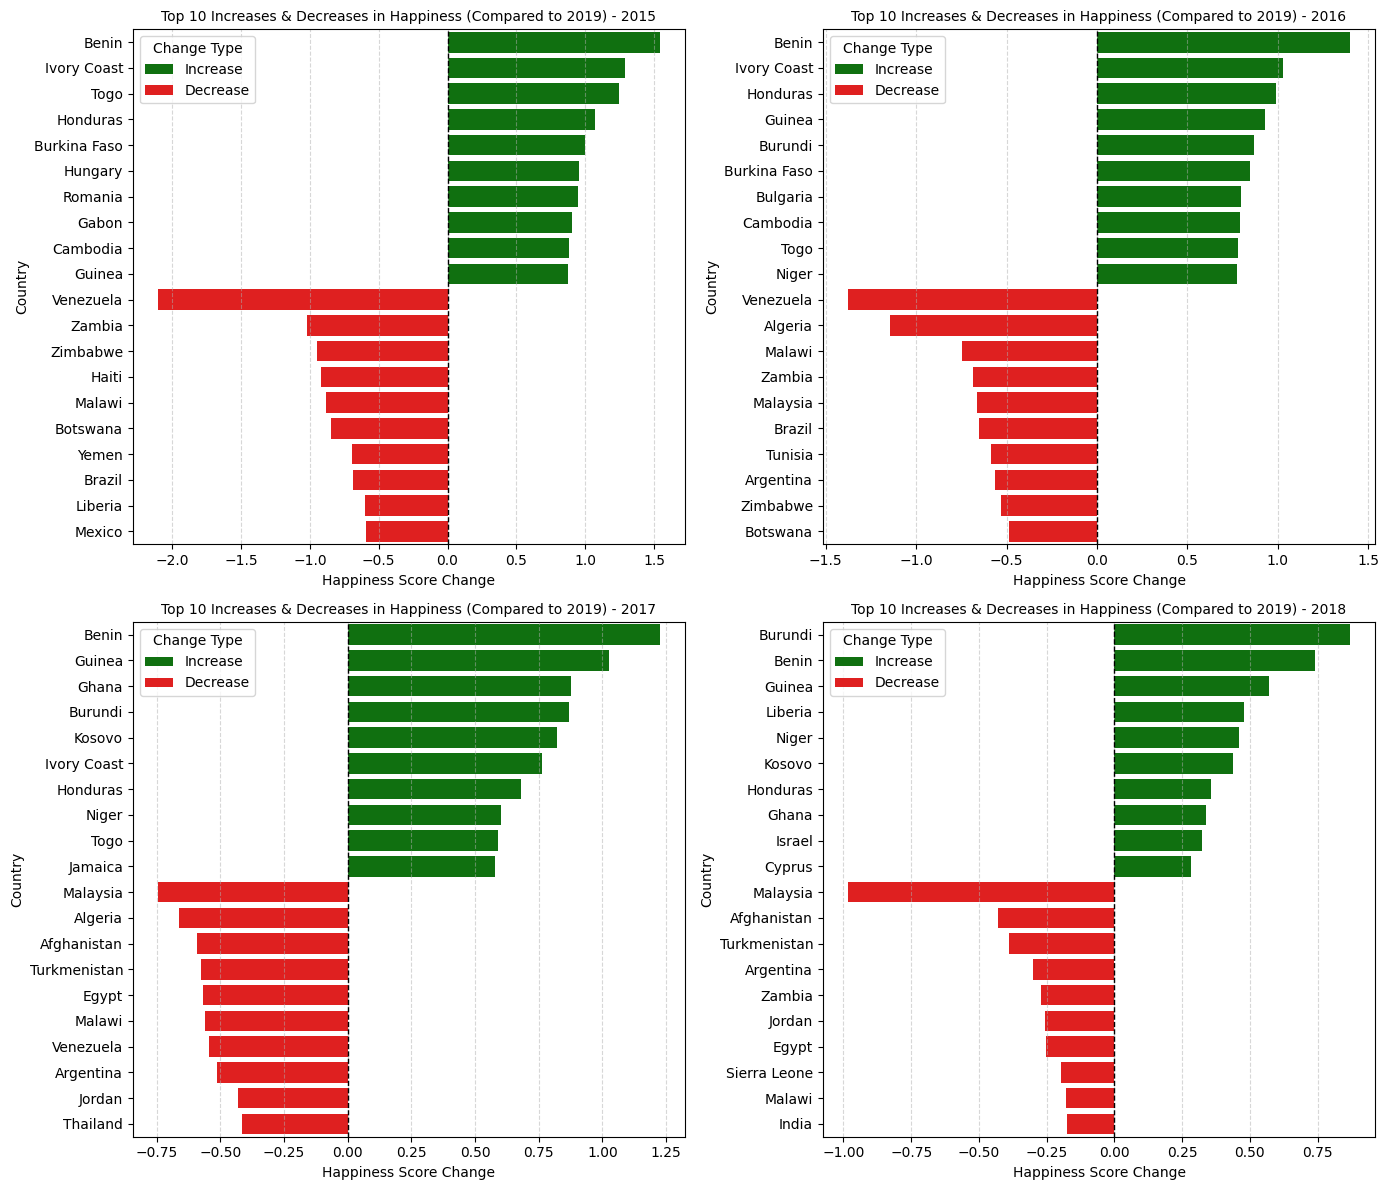

In [5061]:
df_merged["Score Change 2015-2019"] = df_merged["Happiness Score_2019"] - df_merged["Happiness Score_2015"]
df_merged["Score Change 2016-2019"] = df_merged["Happiness Score_2019"] - df_merged["Happiness Score_2016"]
df_merged["Score Change 2017-2019"] = df_merged["Happiness Score_2019"] - df_merged["Happiness Score_2017"]
df_merged["Score Change 2018-2019"] = df_merged["Happiness Score_2019"] - df_merged["Happiness Score_2018"]


df_merged[["Country", "Happiness Score_2017", "Happiness Score_2019", "Score Change 2017-2019"]].sort_values("Score Change 2017-2019", ascending=False).head(20)


top_increases_2015 = df_merged.nlargest(10, "Score Change 2015-2019")[["Country", "Score Change 2015-2019"]]
top_decreases_2015 = df_merged.nsmallest(10, "Score Change 2015-2019")[["Country", "Score Change 2015-2019"]]

top_increases_2016 = df_merged.nlargest(10, "Score Change 2016-2019")[["Country", "Score Change 2016-2019"]]
top_decreases_2016 = df_merged.nsmallest(10, "Score Change 2016-2019")[["Country", "Score Change 2016-2019"]]

top_increases_2017 = df_merged.nlargest(10, "Score Change 2017-2019")[["Country", "Score Change 2017-2019"]]
top_decreases_2017 = df_merged.nsmallest(10, "Score Change 2017-2019")[["Country", "Score Change 2017-2019"]]

top_increases_2018 = df_merged.nlargest(10, "Score Change 2018-2019")[["Country", "Score Change 2018-2019"]]
top_decreases_2018 = df_merged.nsmallest(10, "Score Change 2018-2019")[["Country", "Score Change 2018-2019"]]


def ensure_min_countries(top_increases, top_decreases):
    num_countries = min(10, max(5, len(top_increases))) 
    return top_increases.head(num_countries), top_decreases.head(num_countries)

top_increases_2017, top_decreases_2017 = ensure_min_countries(top_increases_2017, top_decreases_2017)


years = ["2015", "2016", "2017", "2018"]
top_changes = [
    pd.concat([top_increases_2015, top_decreases_2015]),
    pd.concat([top_increases_2016, top_decreases_2016]),
    pd.concat([top_increases_2017, top_decreases_2017]),
    pd.concat([top_increases_2018, top_decreases_2018]),
]


for i in range(len(top_changes)):
    num_countries = len(top_changes[i])
    num_increase = num_countries // 2 
    num_decrease = num_countries - num_increase  


    top_changes[i]["Category"] = ["Increase"] * num_increase + ["Decrease"] * num_decrease


fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for ax, year, data in zip(axes.flat, years, top_changes):
    sns.barplot(
        x=data.iloc[:, 1],
        y=data["Country"],
        hue=data["Category"],
        ax=ax,
        palette={"Increase": "green", "Decrease": "red"}
    )
    ax.axvline(0, color="black", linewidth=1, linestyle="--") 
    ax.set_title(f"Top 10 Increases & Decreases in Happiness (Compared to 2019) - {year}", fontsize=10)
    ax.set_xlabel("Happiness Score Change")
    ax.set_ylabel("Country")
    ax.legend(title="Change Type")
    ax.grid(axis="x", linestyle="--", alpha=0.5)


plt.tight_layout()
plt.show()


### My Analysis

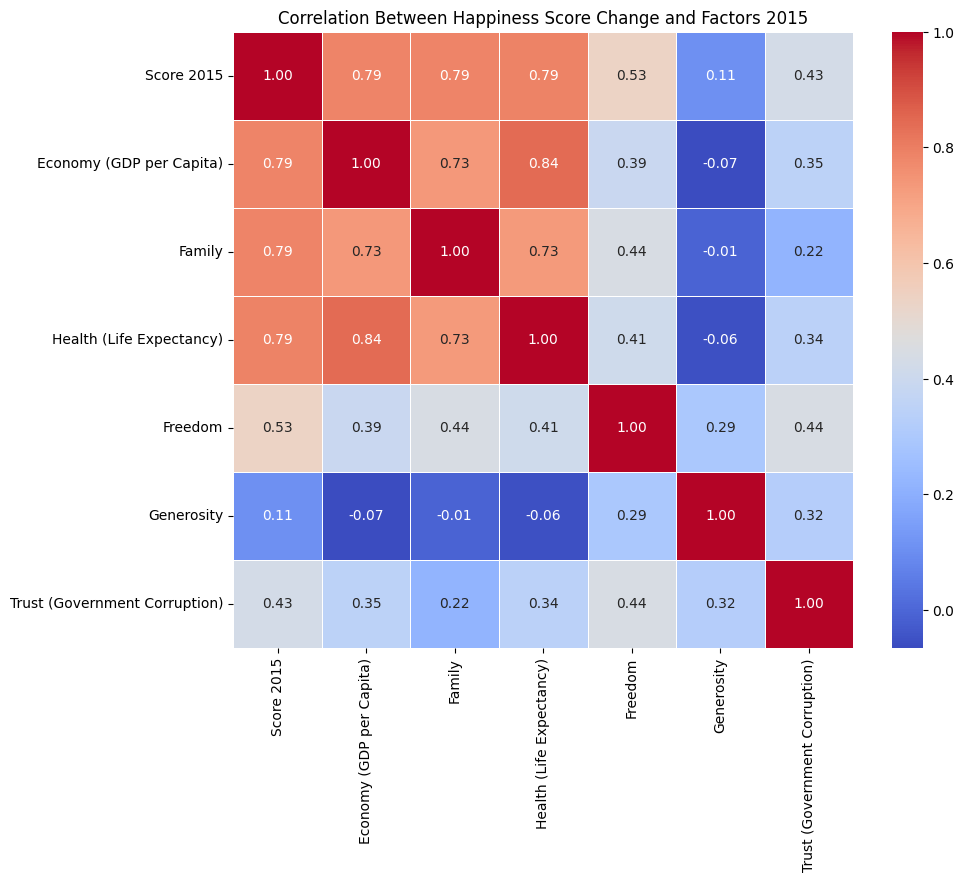

In [5062]:

df_merged["Score 2015"] = df_merged["Happiness Score_2015"] 


columns_of_interest = [
    "Score 2015",
    "Economy (GDP per Capita)",
    "Family",
    "Health (Life Expectancy)",
    "Freedom",
    "Generosity",
    "Trust (Government Corruption)",
]


df_analysis = df_merged[columns_of_interest]


correlation_matrix = df_analysis.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Happiness Score Change and Factors 2015")
plt.show()



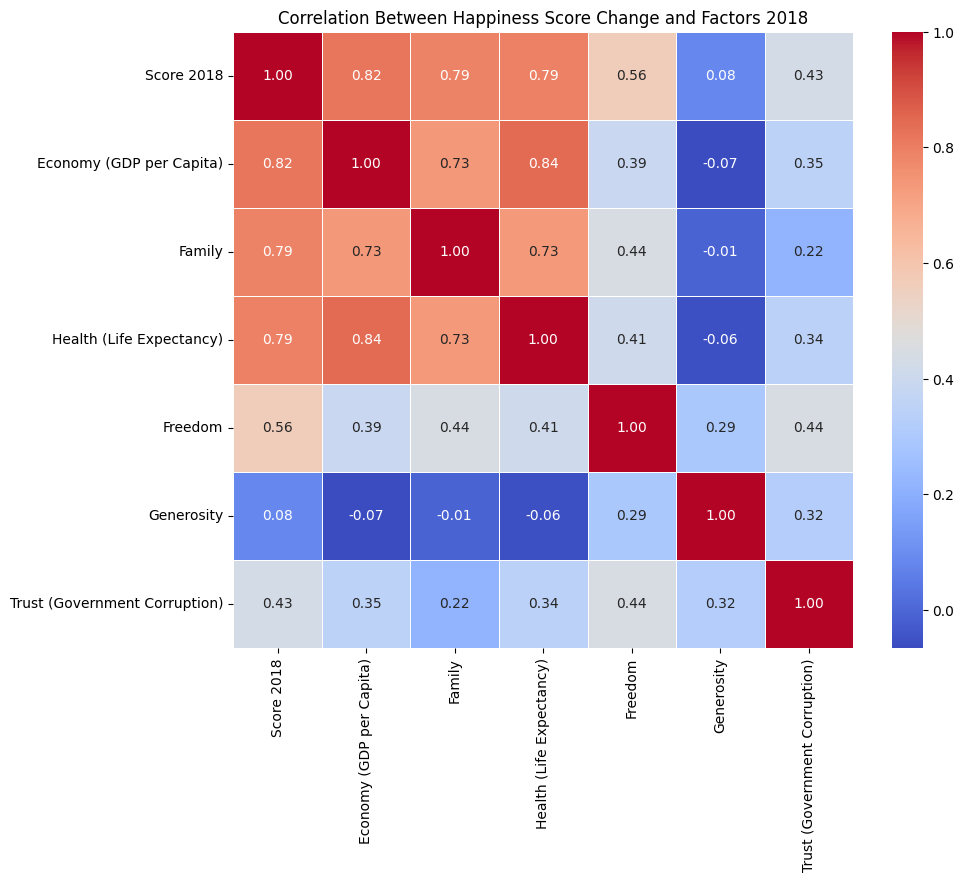

In [5063]:

df_merged["Score 2018"] = df_merged["Happiness Score_2018"] 


columns_of_interest = [
    "Score 2018",
    "Economy (GDP per Capita)",
    "Family",
    "Health (Life Expectancy)",
    "Freedom",
    "Generosity",
    "Trust (Government Corruption)",
]


df_analysis = df_merged[columns_of_interest]


correlation_matrix = df_analysis.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Happiness Score Change and Factors 2018")
plt.show()


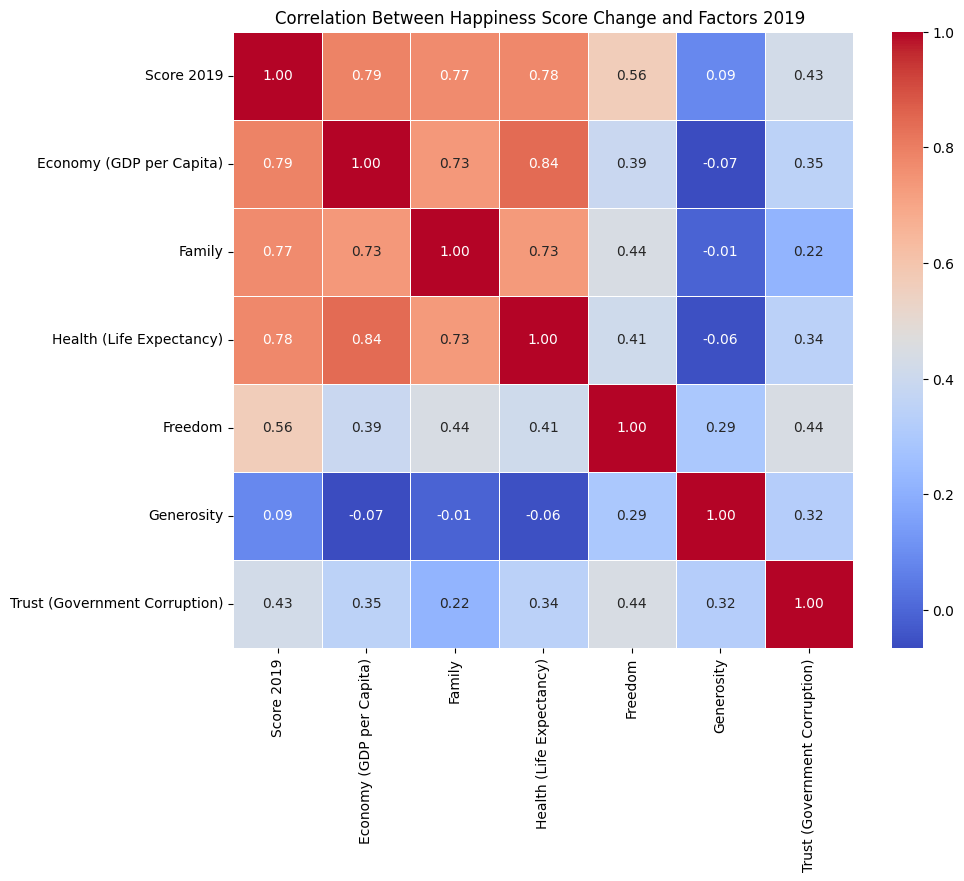

In [5064]:

df_merged["Score 2019"] = df_merged["Happiness Score_2019"] 


columns_of_interest = [
    "Score 2019",
    "Economy (GDP per Capita)",
    "Family",
    "Health (Life Expectancy)",
    "Freedom",
    "Generosity",
    "Trust (Government Corruption)",
]


df_analysis = df_merged[columns_of_interest]


correlation_matrix = df_analysis.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Happiness Score Change and Factors 2019 ")
plt.show()



In [5065]:
# Economy strongly correlates with Health and Family.
# Health and Family also have a strong positive relationship.
# Trust in Government is weakly linked to Health and Freedom.
# Happiness change (2015-2019) has a slight negative correlation with Family.

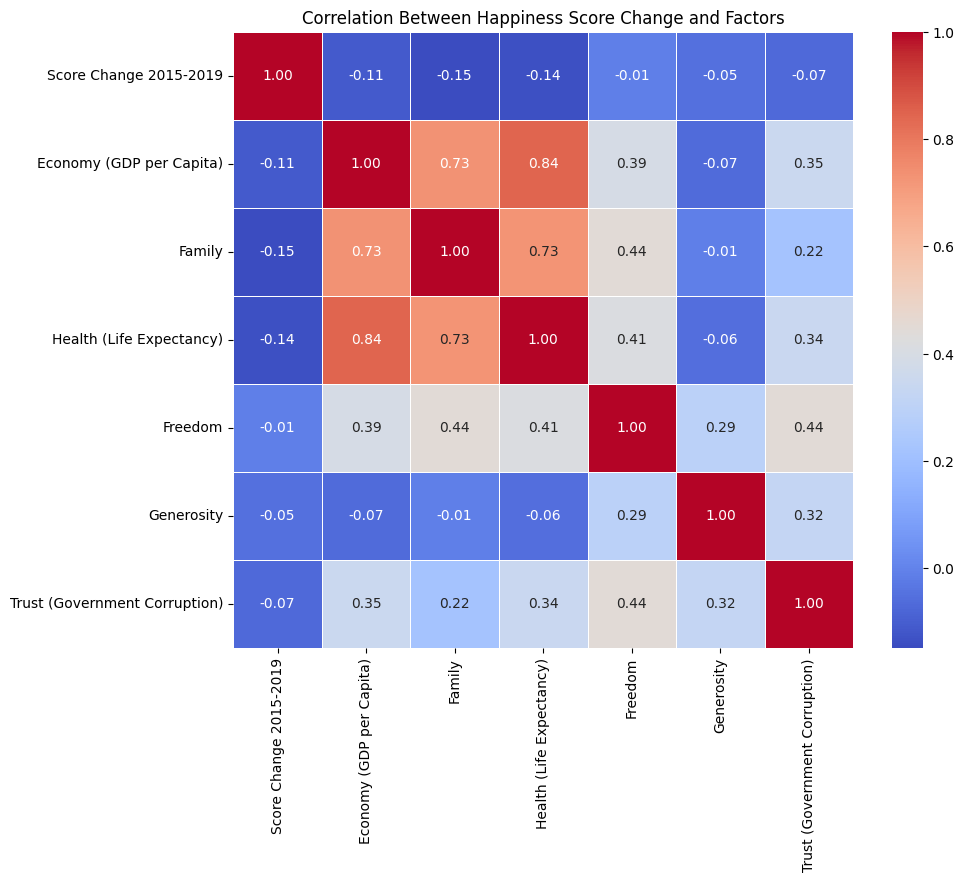

In [5066]:
df_merged["Score Change 2015-2019"] = df_merged["Happiness Score_2019"] - df_merged["Happiness Score_2015"]


columns_of_interest = [
    "Score Change 2015-2019",
    "Economy (GDP per Capita)",
    "Family",
    "Health (Life Expectancy)",
    "Freedom",
    "Generosity",
    "Trust (Government Corruption)",
]

df_analysis = df_merged[columns_of_interest]


correlation_matrix = df_analysis.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Happiness Score Change and Factors")
plt.show()


df_merged_sorted = df_merged.sort_values("Score Change 2015-2019", ascending=False)
top_increased = df_merged_sorted.head(10)[["Country", "Score Change 2015-2019"]]
top_decreased = df_merged_sorted.tail(10)[["Country", "Score Change 2015-2019"]]



In [5067]:
# Western Europe and North America: Highest happiness scores in 2015.
# Southern Asia and Sub-Saharan Africa: Lowest happiness scores, indicating a significant gap.
# Eastern Europe and Central/Eastern Asia: Display more variability, suggesting inequality in happiness levels within those regions.
# Possible Insight: Developed regions tend to have higher and more consistent happiness scores, implying the influence of economic and social factors on well-being.

/var/folders/rx/2m4195h90h7983jbhp4kkypc0000gn/T/ipykernel_3364/1826756986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Happiness Score_2015', data=df_merged, palette='Set3')


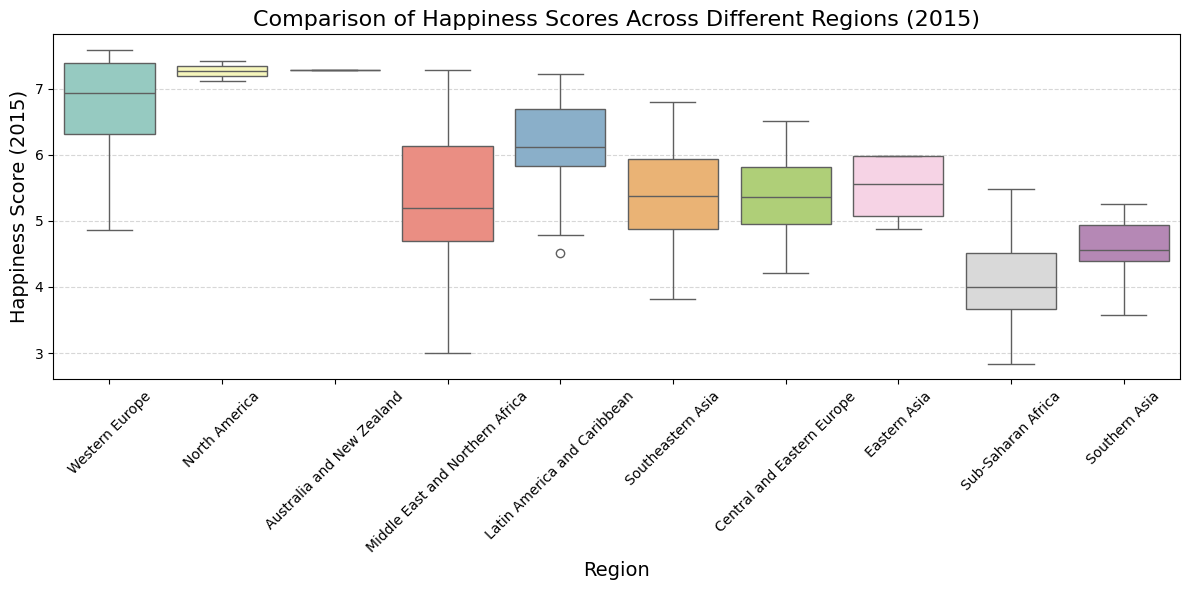

In [5068]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Region', y='Happiness Score_2015', data=df_merged, palette='Set3')


plt.xticks(rotation=45)


plt.title("Comparison of Happiness Scores Across Different Regions (2015)", fontsize=16)

plt.xlabel("Region", fontsize=14)
plt.ylabel("Happiness Score (2015)", fontsize=14)

plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()

plt.show()



In [5069]:
print(df_merged.columns)


Index(['Country', 'Region', 'Happiness Score_2015',
       'Economy (GDP per Capita)_2015', 'Family_2015',
       'Health (Life Expectancy)_2015', 'Freedom_2015', 'Generosity_2015',
       'Trust (Government Corruption)_2015', 'Happiness Score_2016',
       'Economy (GDP per Capita)_2016', 'Family_2016',
       'Health (Life Expectancy)_2016', 'Freedom_2016', 'Generosity_2016',
       'Trust (Government Corruption)_2016', 'Happiness Score_2017',
       'Economy (GDP per Capita)_x', 'Family_x', 'Health (Life Expectancy)_x',
       'Freedom_x', 'Generosity_x', 'Trust (Government Corruption)_x',
       'Happiness Score_2018', 'Economy (GDP per Capita)_y', 'Family_y',
       'Health (Life Expectancy)_y', 'Freedom_y', 'Generosity_y',
       'Trust (Government Corruption)_y', 'Happiness Score_2019',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Score Change 2015-2019', 'Score Change 2016-2019'

In [5070]:
#this chart shows the happiness rank trends of the top 10 countries from 2015 to 2019, highlighting significant changes

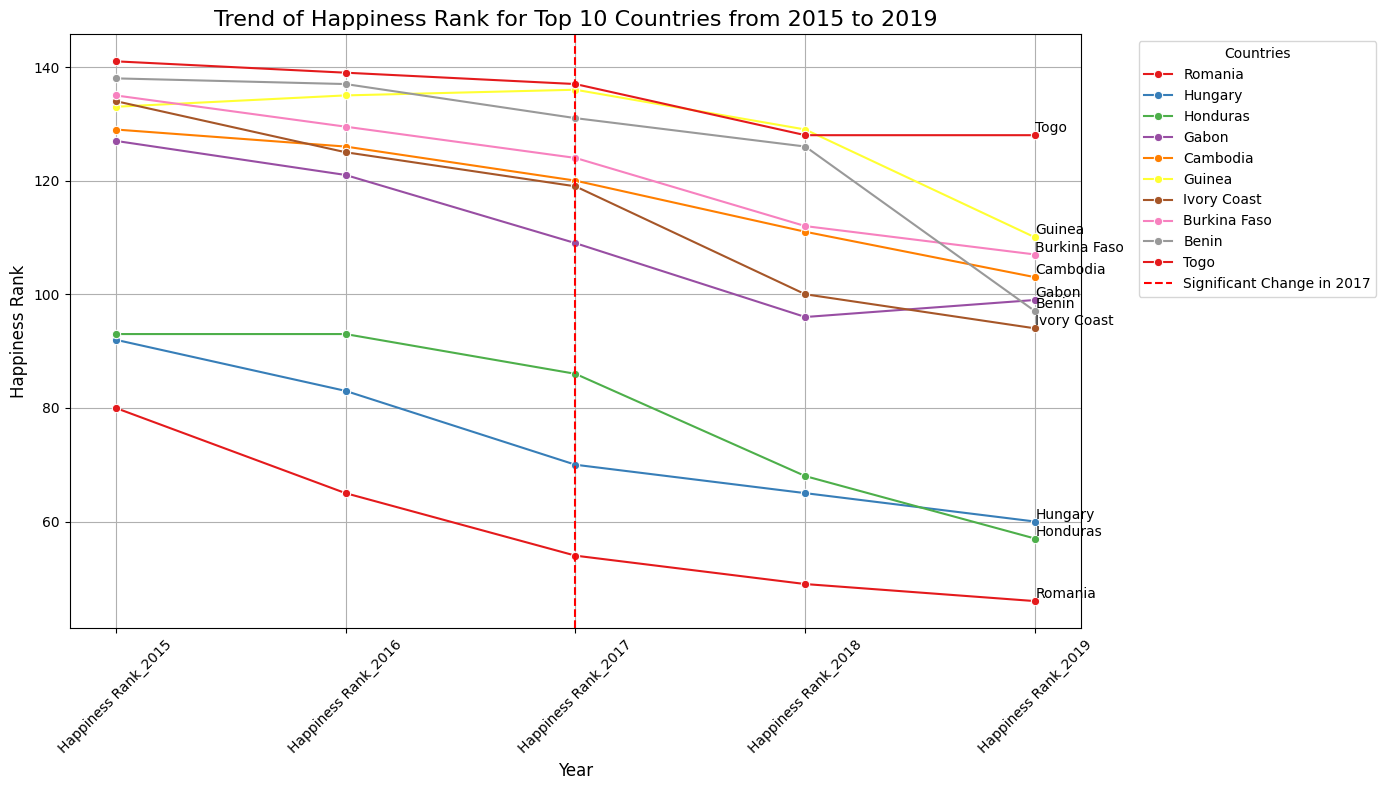

In [5071]:

top_countries = df_merged_sorted.head(10)["Country"]

df_merged_top_countries = df_merged_melted[df_merged_melted["Country"].isin(top_countries)]


plt.figure(figsize=(14, 8))
sns.lineplot(data=df_merged_top_countries, x="Year", y="Rank", hue="Country", marker="o", palette="Set1")

plt.axvline(x=2, color="red", linestyle="--", label="Significant Change in 2017") 

for country in top_countries:
    country_data = df_merged_top_countries[df_merged_top_countries["Country"] == country]
    plt.text(x=country_data["Year"].iloc[-1], y=country_data["Rank"].iloc[-1], 
             s=country, color="black", ha="left", va="bottom", fontsize=10)

plt.title("Trend of Happiness Rank for Top 10 Countries from 2015 to 2019", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Happiness Rank", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)


plt.tight_layout()
plt.show()
